<div style=" background-color: RGB(5, 0, 250);" >
<h1 style="margin: auto; padding: 20px 0; color:#fff; text-align: center">Projet 10 - DATA ANALYSE</h1>
<h2 style="margin: auto; padding: 20px 0; color:#fff; text-align: center">Détectez des faux billets avec R ou Python</h2>
<h3 style="margin: auto; padding: 20px 0; color:#fff; text-align: center">DELCOURT Jade
</h3>
</div>

# Import des librairies et chargement du fichier 

##### Import de librairies 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns
import statsmodels.api as sm
import scipy.stats as stats
import pylab
import sklearn as sk

# Regression linéaire
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from scipy.stats import shapiro
from statsmodels.stats.diagnostic import het_breuschpagan
from statsmodels.stats.stattools import durbin_watson

# K-means
from sklearn import metrics
from sklearn import cluster
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

# ACP
from sklearn.decomposition import PCA

# Regression logistique
from sklearn.linear_model import LogisticRegression
from sklearn import preprocessing
from sklearn.metrics import roc_auc_score, roc_curve, auc, accuracy_score, confusion_matrix, classification_report
from scipy.stats import chi2
from sklearn.feature_selection import RFECV

##### Chargement des fichiers CSV 
Chargement du fichier

In [2]:
data = pd.read_csv(r"C:\Users\dltja\OneDrive\Documents\DATA ANALYST\PROJETS\Projet 10 - Détectez des faux billets avec R ou Python\billets.csv", sep=';')

# Vérification de l'import et nettoyage du fichier

Vérification de l'import fichier des billets.

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1500 entries, 0 to 1499
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   is_genuine    1500 non-null   bool   
 1   diagonal      1500 non-null   float64
 2   height_left   1500 non-null   float64
 3   height_right  1500 non-null   float64
 4   margin_low    1463 non-null   float64
 5   margin_up     1500 non-null   float64
 6   length        1500 non-null   float64
dtypes: bool(1), float64(6)
memory usage: 71.9 KB


Vérification du nombre de valeurs null par colonne.

In [4]:
data.isnull().sum()

is_genuine       0
diagonal         0
height_left      0
height_right     0
margin_low      37
margin_up        0
length           0
dtype: int64

Il y a 37 valeurs null dans la colonne margin_low.

In [5]:
data

,is_genuine,diagonal,height_left,height_right,margin_low,margin_up,length
0,True,171.81,104.86,104.95,4.52,2.89,112.83
1,True,171.46,103.36,103.66,3.77,2.99,113.09
2,True,172.69,104.48,103.50,4.40,2.94,113.16
3,True,171.36,103.91,103.94,3.62,3.01,113.51
4,True,171.73,104.28,103.46,4.04,3.48,112.54
...,...,...,...,...,...,...,...
1495,False,171.75,104.38,104.17,4.42,3.09,111.28
1496,False,172.19,104.63,104.44,5.27,3.37,110.97
1497,False,171.80,104.01,104.12,5.51,3.36,111.95
1498,False,172.06,104.28,104.06,5.17,3.46,112.25


In [6]:
print("Le tableau comporte", data.shape[0], "lignes et", data.shape[1], "colonnes.")

Le tableau comporte 1500 lignes et 7 colonnes.


Vérification du nombre de doublons et affichage de doublons supprimer 

In [7]:
print('Nombre de doublons supprimer :',len(data) - len(data.drop_duplicates()))

Nombre de doublons supprimer : 0


# Analyse descriptive du fichier 

In [8]:
data.describe()

,diagonal,height_left,height_right,margin_low,margin_up,length
count,1500.000000,1500.000000,1500.000000,1463.000000,1500.000000,1500.00000
mean,171.958440,104.029533,103.920307,4.485967,3.151473,112.67850
std,0.305195,0.299462,0.325627,0.663813,0.231813,0.87273
min,171.040000,103.140000,102.820000,2.980000,2.270000,109.49000
25%,171.750000,103.820000,103.710000,4.015000,2.990000,112.03000
50%,171.960000,104.040000,103.920000,4.310000,3.140000,112.96000
75%,172.170000,104.230000,104.150000,4.870000,3.310000,113.34000
max,173.010000,104.880000,104.950000,6.900000,3.910000,114.44000


J'affiche le nombre de variable vrai/faux puis réalise un diagramme cirulaire pour la visualisation avec l'affichage du pourcentage que représente que part.

In [9]:
data['is_genuine'].value_counts()

True     1000
False     500
Name: is_genuine, dtype: int64

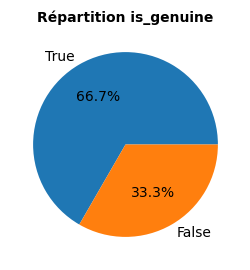

In [10]:
plt.figure(figsize=(3, 3))
plt.title("Répartition is_genuine", fontsize=10, fontweight='bold')
plt.pie(data['is_genuine'].value_counts(), labels=['True','False'], autopct="%1.1f%%")
plt.savefig('Répartition is_genuine.png')
plt.show()

Identification des coorélations entre mes différentres variables grâce à une carte thermique.

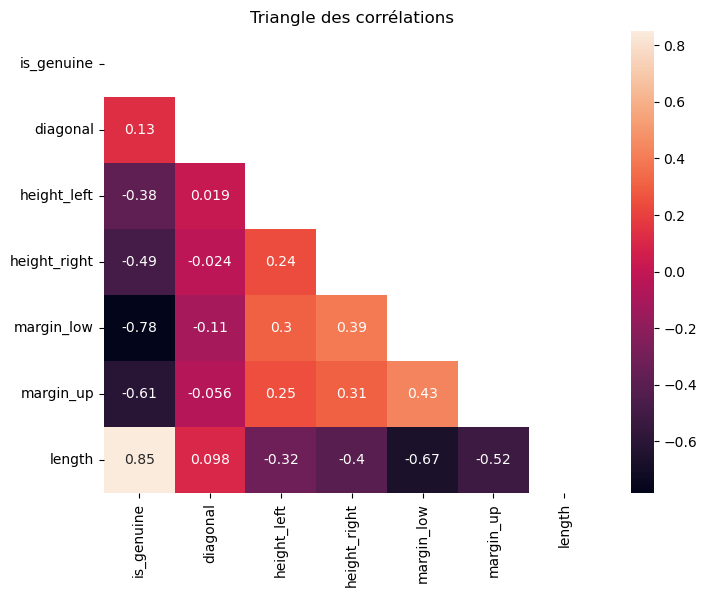

In [11]:
matrix = data.corr()
mask = np.triu(np.ones_like(matrix))
plt.figure(figsize=(8, 6))
sns.heatmap(matrix, mask=mask, annot=True)
plt.title('Triangle des corrélations')
plt.savefig('Triangle des corrélations.png')
plt.show()

Les 2 variables quantitative les plus corréler sont 'length' et 'margin_low', elle sont corréler négativement !

- 'length' est aussi assez bien corréler à 'height_right' et 'margin_up'
- 'margin_up' est assez bien corréler à 'margin_low'
---

Liste des variables les plus corréler à 'is_genuine' dans l'odre décroissant sont :
- 'length'
- 'margin_low'
- 'margin_up'
- 'height_right'
- 'height_left'
- 'diagonal'

Visualisation via nuage de points des différentes relations entre les variables

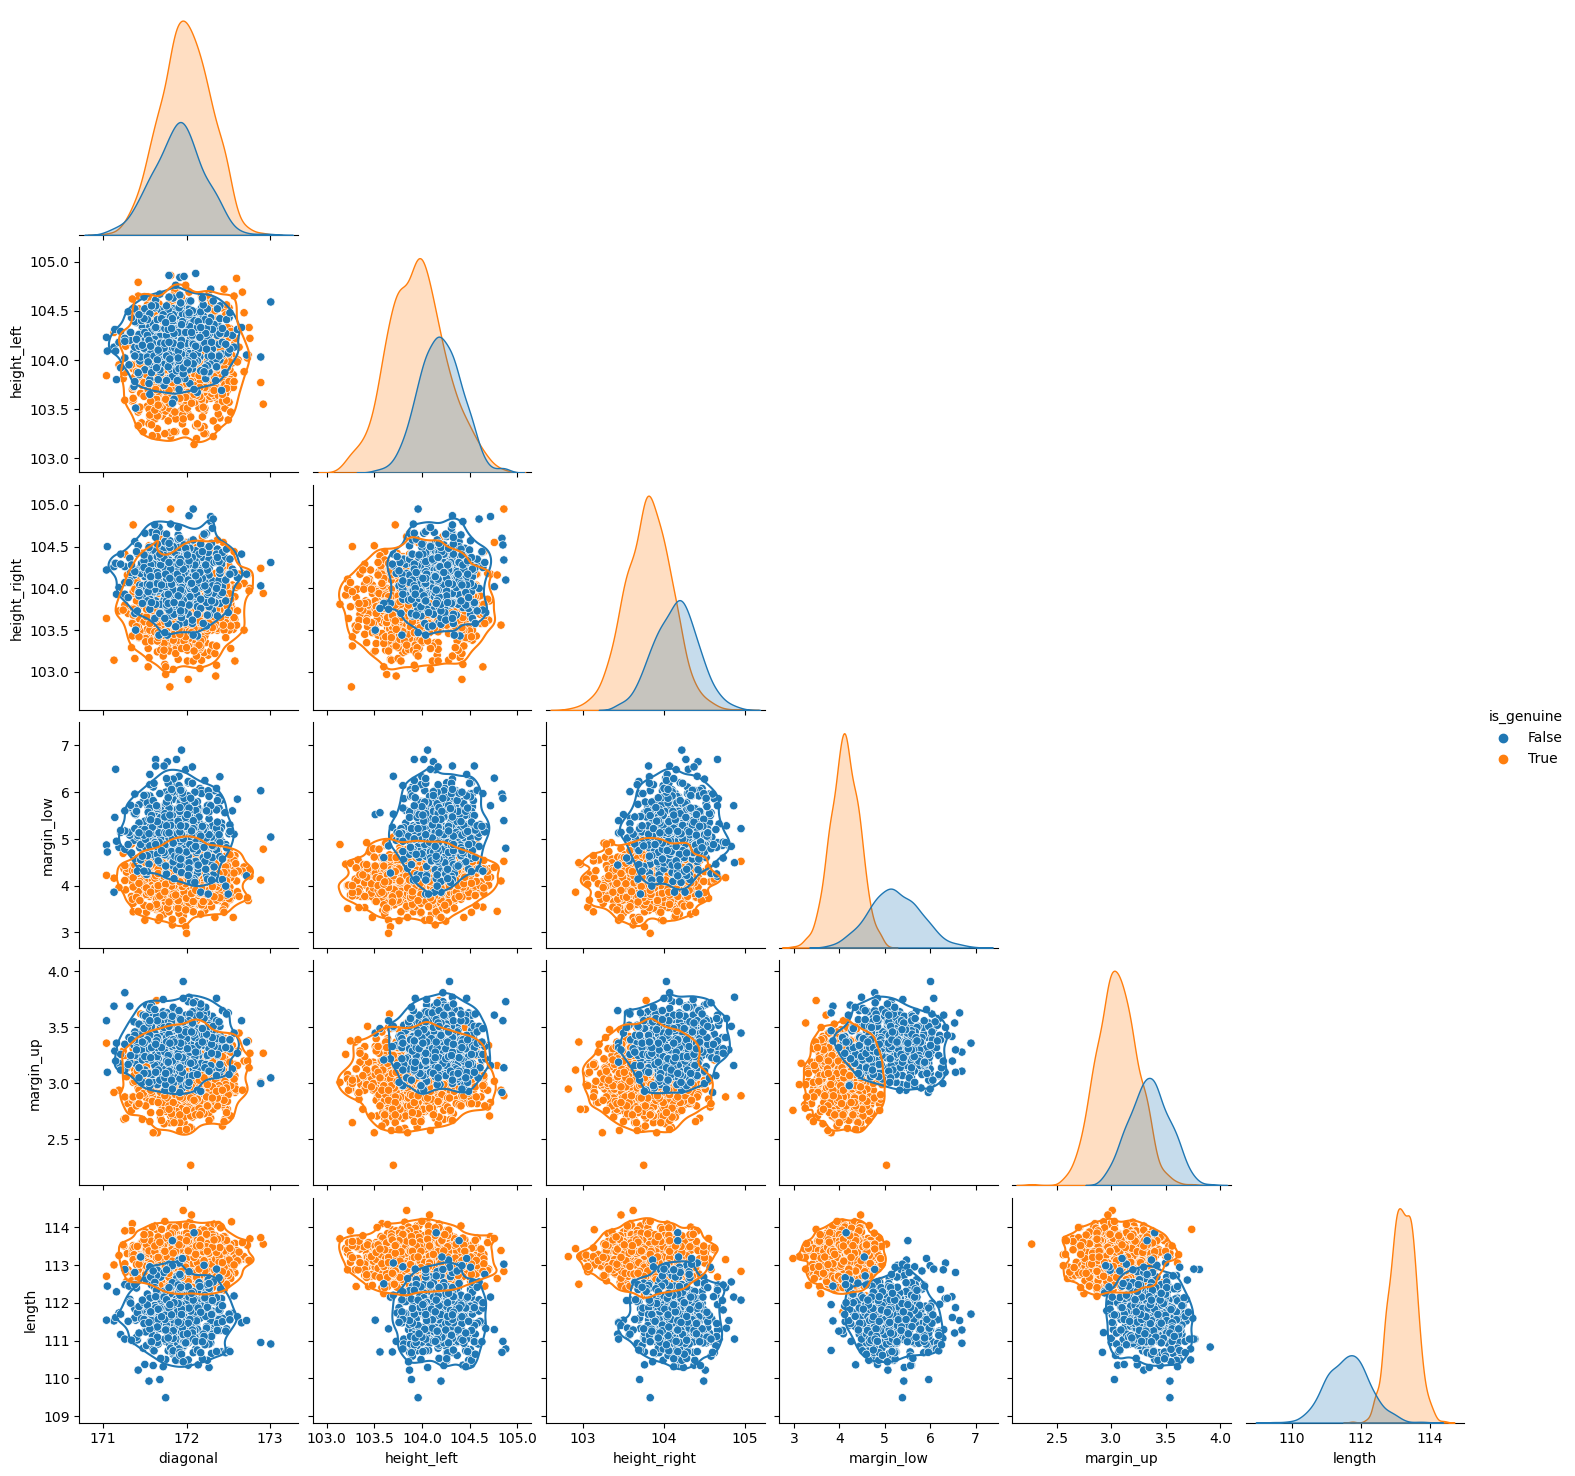

In [12]:
l = sns.pairplot(data, hue='is_genuine', corner=True)
l.map_lower(sns.kdeplot, levels=2, color='.2')
plt.savefig('Triangle des nuages de points.png')
plt.show()

On peut constater que la ou les deux groupes sont le plus distinct est sur la variable 'length'.

Comparaison visuelle des vrai et faux billets pour chaque variables via boîte à moustaches.

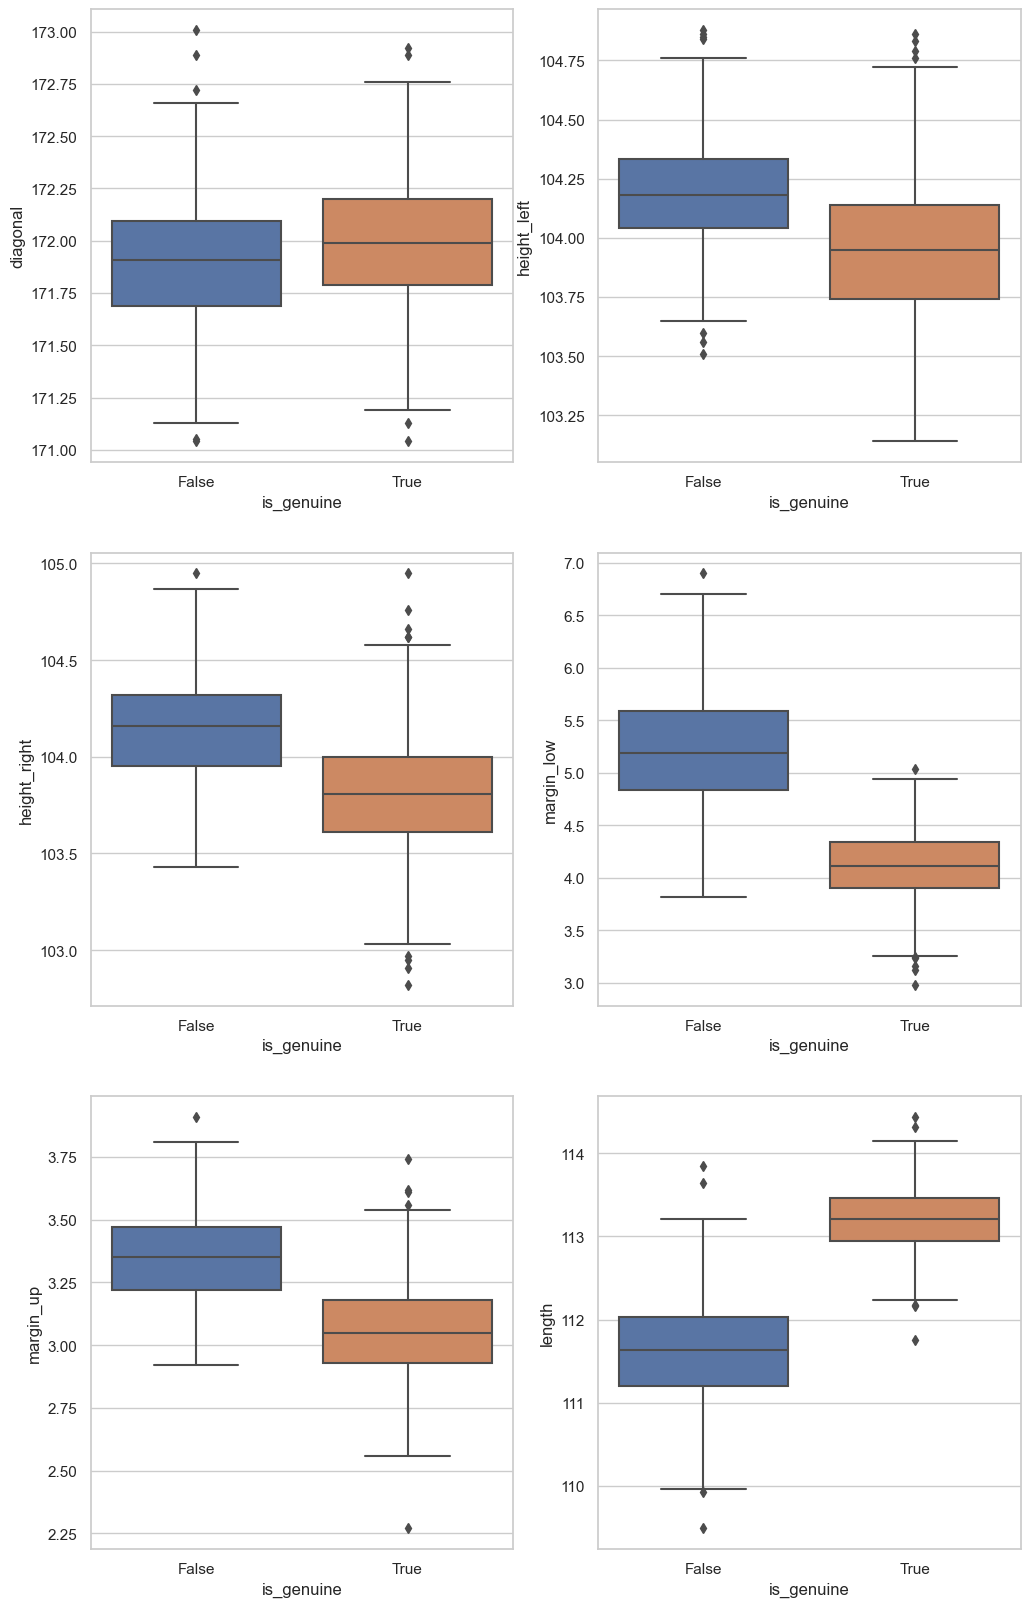

In [13]:
plt.figure(figsize=(12, 20))
sns.set(style="whitegrid")

plt.subplot(321)
sns.boxplot(data=data, x='is_genuine', y='diagonal')

plt.subplot(322)
sns.boxplot(data=data, x='is_genuine', y='height_left')

plt.subplot(323)
sns.boxplot(data=data, x='is_genuine', y='height_right')

plt.subplot(324)
sns.boxplot(data=data, x='is_genuine', y='margin_low')

plt.subplot(325)
sns.boxplot(data=data, x='is_genuine', y='margin_up')

plt.subplot(326)
sns.boxplot(data=data, x='is_genuine', y='length')

plt.savefig('Boîte à moustaches.png')
plt.show(block=False)

On peut constater que la ou les deux groupes sont le plus distinct est sur les variable 'length' et 'margin_low'.

Visualisation des vrais/faux billets sur 'margin_low' par rapport à 'length'

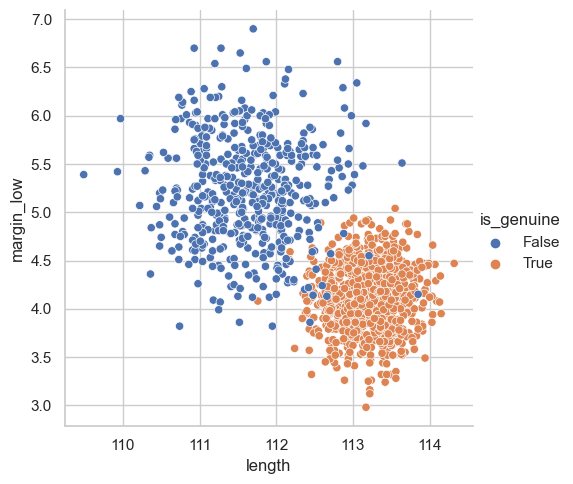

In [14]:
x = data['length']
y = data['margin_low']
z = data['is_genuine']

sns.relplot(x = x, y = y, hue= z)
plt.show()

# Enrichissement des données

Suppréssion des ligne contenant 1 valeurs manquantes

In [15]:
data_full = data.dropna(inplace=False)

### Régression linéaire simple

explication régression linéaire

##### 1) Régression linéaire simple calcul

Etablissement des varibles nécéssaire pour réaliser la régression linéaire simple. 
- X représente la variable de prédiction
- y représente la varible à prédir

In [16]:
X = data_full[['length']]
y = data_full['margin_low']

Division des données en ensemble d'entraînement et de test

In [17]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Etablissement du modèle de régression linéaire ainsi que l'entraînement de celui-ci

In [18]:
lr = LinearRegression()
lr.fit(X_train, y_train) 

LinearRegression()

Prédiction 

In [19]:
y_pred_simple = lr.predict(X_test)

Représentation graphique de la régression linéaire simple

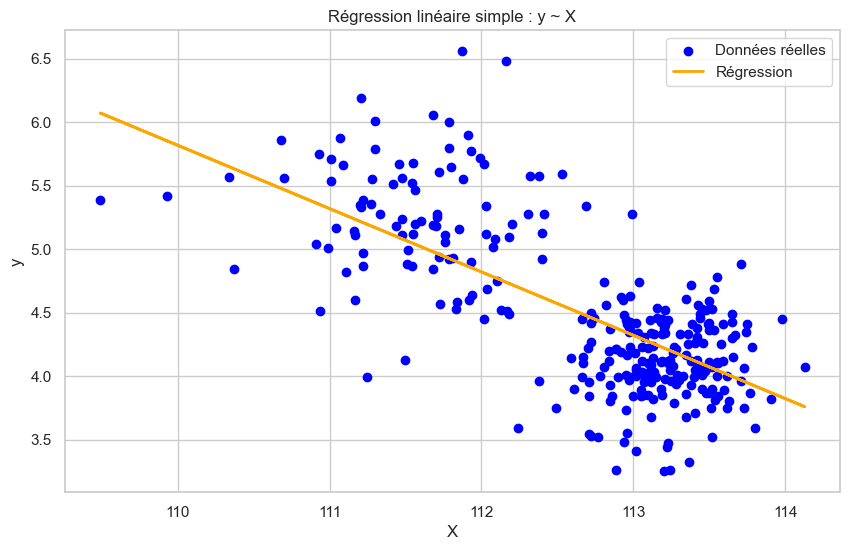

In [20]:
plt.figure(figsize=(10, 6))
plt.scatter(X_test, y_test, color='blue', label='Données réelles')  
plt.plot(X_test, y_pred_simple, color='orange', linewidth=2, label='Régression') 
plt.title('Régression linéaire simple : y ~ X')
plt.xlabel('X')
plt.ylabel('y')
plt.legend()
plt.show()

##### 2) Régression linéaire simple coefficient de détermination

In [21]:
print('Constante :',lr.intercept_.round(2))
print(f'Coef :', lr.coef_.round(2))
print('R² :',lr.score(X,y))

Constante : 60.71
Coef : [-0.5]
R² : 0.44444660414486237


Constante : 
- Elle correspond à la valeur prédite par le modèle lorsque toutes les variables explicatives sont nulles.
- Ici, si la valeur de la variable 'length' est 0, le modèle prédit une valeur cible de 60.71.

Coef : 
- Il indique la pente de chaque variable sur la variable cible.
- Ici, le coef de la pente est négatif et qu'il y a une coorélation négative entre les deux variables.

R² :  
- Il mesure la proportion de la variance de la variable cible expliquée par le modèle.
- Ici, R²=0.44 soit 44 % de la variance de la variable 'margin_low' est expliquée par la variable 'length'. 
---

Ce modèle semble sous-performant je vais donc tester la régrssion linéaire multiple. En ajoutant d'autre variable explicatives j'espère amélioré la prédiction.

### Régression linéaire multiple

explication régression linéaire

##### 1) Régression linéaire multiple calcul

Etablissement des varibles nécéssaire pour réaliser la régression linéaire multiple. 
- X représente les variables de prédiction
- y représente la varible à prédir

In [22]:
X = data_full[['diagonal', 'height_left', 'height_right', 'margin_up', 'length']]  
y = data_full['margin_low']

Division des données en ensemble d'entraînement et de test

In [23]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print('X_train :', len(X_train), 'lignes',
    '\ny_train :', len(y_train), 'lignes',
    '\nX_test :', len(X_test), 'lignes',
    '\ny_test :', len(y_test), 'lignes')

X_train : 1170 lignes 
y_train : 1170 lignes 
X_test : 293 lignes 
y_test : 293 lignes


Etablissement du modèle de régression linéaire ainsi que l'entraînement de celui-ci

In [24]:
lr = LinearRegression()
lr.fit(X_train, y_train)

LinearRegression()

Prédiction 

In [25]:
y_pred_multiple = lr.predict(X_test)

##### 2) Régression linéaire multiple coefficient de détermination

In [26]:
print('Constante :',lr.intercept_.round(2))
print('Coef :', lr.coef_.round(2))
print('R² :',round(lr.score(X,y),2))

Constante : 20.4
Coef : [-0.09  0.15  0.26  0.29 -0.4 ]
R² : 0.48


Constante : 
- Elle correspond à la valeur prédite par le modèle lorsque toutes les variables explicatives sont nulles.
- Ici, si la valeur de la variable 'length' est 0, le modèle prédit une valeur cible de 20.40.

Coef : 
- Il indique la pente de chaque variable sur la variable cible.
- Les coefs négatifs des pentes indiquent une coorélation négative entre les variables 'diagonal'/'margin_low' et 'length'/'margin_low'.
- Les coefs positifs des pentes indiquent une coorélation positives entre les variables 'height_left'/'margin_low', 'height_right'/'margin_low' et 'margin_up'/'margin_low'.


R² :  
- Il mesure la proportion de la variance de la variable cible expliquée par le modèle.
- Ici, R²=0.48 soit 48 % de la variance de la variable 'margin_low' est expliquée par les variable 'diagonal', 'height_left', 'height_right', 'margin_up' et 'length'. 
---

Ce modèle semble plus performant mais reste sous-performant. Je vais donc vérifier les résidus ainsi que des métriques alternatives tels que MAE, MSE et RMSE.

MAE : l'indicateur de l'erreur de la moyenne absolue.

MSE : l'indicateur de l'erreur de la moyenne absolue au carré.

RMSE : l'indicateur de l'erreur quadratique moyenne est la racine carrée de la moyenne de la somme des carrés des valeurs résiduelles. 

In [27]:
print("MAE est de :" , metrics.mean_absolute_error(y_test, y_pred_multiple).round(2))
print("MSE est de :", metrics.mean_squared_error(y_test, y_pred_multiple).round(2))
print("RMSE est de :", np.sqrt(metrics.mean_squared_error(y_test, y_pred_multiple)).round(2))

MAE est de : 0.34
MSE est de : 0.19
RMSE est de : 0.44


Le MAE ,MSE et RMSE sont des indicateur qui nous permettent d'en savoir plus sur nos résidus. Plus l'indicateur est faible, meilleur sera le modèle.

Ici on voit que nos indicateurs sont assez faible cela nous indique que notre modèle est tout de même performant.

##### 3) Régression linéaire multiple hypothèses du modèle linéaire gaussien

Les hypothèses fondamentales d’un modèle linéaire sont les suivantes :
- Linéarité : La relation entre yy et les xx est linéaire.
- Normalité des résidus.
- Homoscédasticité : Variance constante des résidus.
- Indépendance des résidus.

Calcul des résidus

In [28]:
residuals = y_test - y_pred_multiple

*a) Normalité des résidus*

Visulisation des résidues avec un histogramme et des QQ Plot

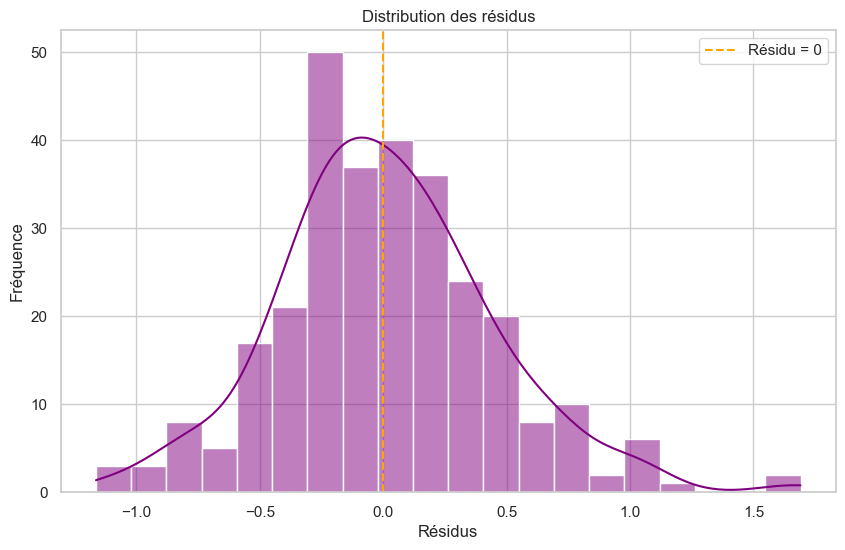

<Figure size 1000x600 with 0 Axes>

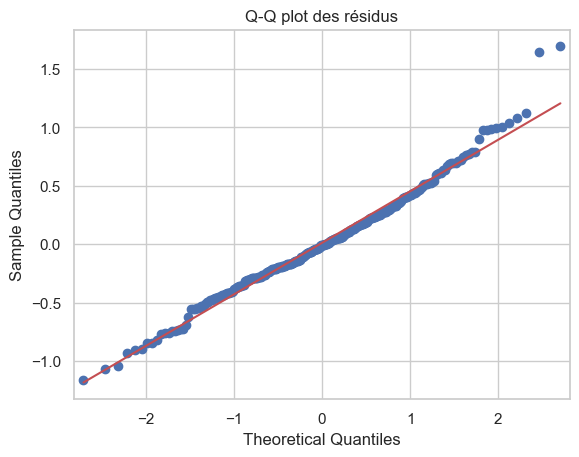

In [29]:
plt.figure(figsize=(10, 6))
sns.histplot(residuals, kde=True, bins=20, color='purple')
plt.title('Distribution des résidus')
plt.xlabel('Résidus')
plt.ylabel('Fréquence')
plt.axvline(0, color='orange', linestyle='--', label='Résidu = 0')
plt.legend()
plt.savefig('Distribution des résidus.png')
plt.show()

plt.figure(figsize=(10, 6))
sm.qqplot(residuals, line='r')
plt.title("Q-Q plot des résidus")
plt.savefig('Q-Q plot des résidus.png')
pylab.show()

In [30]:
shapiro_test = shapiro(residuals)
print("Shapiro-Wilk Test:")
print(f"Statistique =", shapiro_test.statistic)
print(f"p-value =", shapiro_test.pvalue)

Shapiro-Wilk Test:
Statistique = 0.9850907921791077
p-value = 0.003897853661328554


Les deux graphiques nous montre une distribution normal des résidus.

Le test statistique de Shapiro-Wilk quant a lui nous indique que les données sont proche de la normalité mais ne le sont pas strictement avec une valeur statistique proche de 1 qui prouve leurs normalité mais une p-value < 0.05 qui elle indique donc l'inverse.

*b) Homoscédasticité des résidus*

Visulisation des résidues vs la prédictions

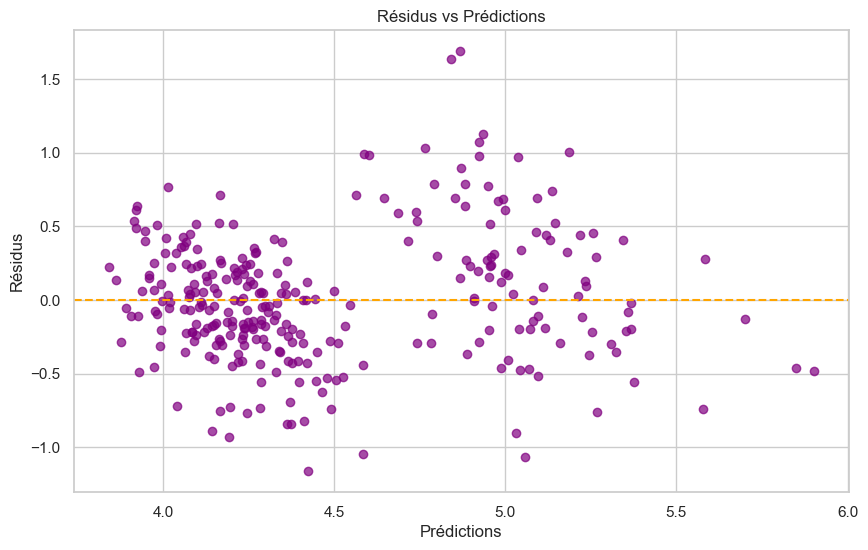

In [31]:
plt.figure(figsize=(10, 6))
plt.scatter(y_pred_multiple, residuals, alpha=0.7, color='purple')
plt.axhline(0, color='orange', linestyle='--')
plt.title('Résidus vs Prédictions')
plt.xlabel('Prédictions')
plt.ylabel('Résidus')
plt.savefig('Résidus vs Prédictions.png')
plt.show()

In [32]:
bp_test = het_breuschpagan(residuals, X_test)
print("Breusch-Pagan Test:") 
print(f"Statistique =", bp_test[0]) 
print(f"p-value =", bp_test[1])

Breusch-Pagan Test:
Statistique = 85.57097427058798
p-value = 1.147702208674007e-17


Le graphique et le test statistique de Breusch-Pagan nous indique avec une valeur statistique élevé et une p-value < 0.05 que la variance des résidues n'est pas constante et que la régresion linéaire multiple peut ne pas être fiable pour la prédiction des valeurs de la variable à prédire.

*c) Indépendance des résidus*

In [33]:
dw_stat = durbin_watson(residuals)
print(f"Statistique de Durbin-Watson : {dw_stat}")

Statistique de Durbin-Watson : 1.9376436012132772


Le test de Durbin-Watson nous indique avec une valeur statistique proche de 2 que les résidus sont bien indépendants.

---
Conclusion de l'analyse de mes résidus :
- Normalité des résidus : hypothèse partiellement validé.
- Homoscédasticité : hypothèse non validé, mais cela peut être interpréter comme preuve qu'il y a bien une variance avec les billets qui sont faux de ceux qui sont vrais.
- Indépendance des résidus hypothèse validé. 

Avec cette conclusion je vais quand même prédire les valeurs manquantes de 'margin_low' sachant qu'il y aura une certaine marge d'erreur avec mon modèle.


### Complétion des valeurs manquantes

Prédiction des valeurs 'margin_low' manquantes grâce aux autres valeurs en utilisant la régression linéaire multiple.

In [34]:
df_nan = data[data['margin_low'].isnull()]
df_c = df_nan.loc[:,['diagonal', 'height_left', 'height_right', 'margin_up', 'length']]
y_nan = lr.predict(df_c).round(2)

data_pred = pd.DataFrame(y_nan)
data_pred.rename(columns = {0:'margin_low'}, inplace = True)

data_pred['is_genuine'] = df_nan['is_genuine'][:, np.newaxis]
data_pred['diagonal'] = df_nan['diagonal'][:, np.newaxis]
data_pred['height_left'] = df_nan['height_left'][:, np.newaxis]
data_pred['height_right'] = df_nan['height_right'][:, np.newaxis]
data_pred['margin_up'] = df_nan['margin_up'][:, np.newaxis]
data_pred['length'] = df_nan['length'][:, np.newaxis]

data_pred = data_pred.reindex(columns = ['is_genuine', 'diagonal', 'height_left', 'height_right', 'margin_low', 'margin_up', 'length'])

data_pred.head(5)

C:\Users\dltja\AppData\Local\Temp\ipykernel_16152\1240279988.py:8: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  data_pred['is_genuine'] = df_nan['is_genuine'][:, np.newaxis]
C:\Users\dltja\AppData\Local\Temp\ipykernel_16152\1240279988.py:9: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  data_pred['diagonal'] = df_nan['diagonal'][:, np.newaxis]
C:\Users\dltja\AppData\Local\Temp\ipykernel_16152\1240279988.py:10: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  data_pred['height_left'] = df_nan['height_left'][:, np.newaxis]
C:\Users\dltja\AppData\Local\Temp\ipykernel_16152\1240279988.p

,is_genuine,diagonal,height_left,height_right,margin_low,margin_up,length
0,True,171.94,103.89,103.45,4.32,3.25,112.79
1,True,171.93,104.07,104.18,4.39,3.14,113.08
2,True,172.07,103.80,104.38,4.42,3.02,112.93
3,True,171.45,103.66,103.80,4.34,3.62,113.27
4,True,171.83,104.14,104.06,4.63,3.02,112.36


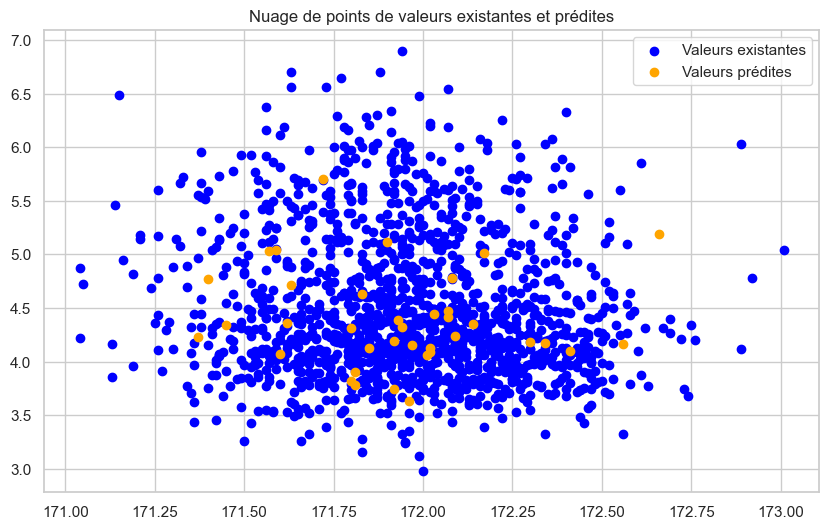

In [35]:
plt.figure(figsize=(10, 6))
plt.scatter(data['diagonal'], data['margin_low'], label="Valeurs existantes", color="blue")
plt.scatter(data_pred['diagonal'], data_pred['margin_low'], label="Valeurs prédites", color="orange")
plt.title('Nuage de points de valeurs existantes et prédites')
plt.legend()
plt.savefig('Nuage de points de valeurs existantes et prédites.png')
plt.show()

In [36]:
data = pd.concat([data_full, data_pred])
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1500 entries, 0 to 36
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   is_genuine    1500 non-null   bool   
 1   diagonal      1500 non-null   float64
 2   height_left   1500 non-null   float64
 3   height_right  1500 non-null   float64
 4   margin_low    1500 non-null   float64
 5   margin_up     1500 non-null   float64
 6   length        1500 non-null   float64
dtypes: bool(1), float64(6)
memory usage: 83.5 KB


J'ai bien 1 500 valeurs dans la colonne margin_low, je n'ai plus de valeurs manquantes.

# Analyse des données

Je supprime la variable qualitative

In [37]:
data_exp = data.drop(['is_genuine'], axis=1)

### Normalisation des données

On normalise les données afin d'avoir une analyse la plus fidèle possible, en étant sur la même échelle. 
Je transformation mon dataframe en array Numpy. Je réalise également une indexation selon les pays par la fonction .set_index()

Je centre et réduit mes données pour que nos données soit à la même échelle. Puis j'affiche dans un nouveau dataframe mes donées centrés et réduites à la même échelle.

In [38]:
std_scale = sk.preprocessing.StandardScaler().fit(data_exp)
data_norma = pd.DataFrame(std_scale.transform(data_exp), columns=data_exp.columns)
data_norma

,diagonal,height_left,height_right,margin_low,margin_up,length
0,-0.486540,2.774123,3.163240,0.055496,-1.128325,0.173651
1,-1.633729,-2.236535,-0.799668,-1.082132,-0.696799,0.471666
2,2.397823,1.504756,-1.291191,-0.126525,-0.912562,0.551901
3,-1.961498,-0.399294,0.060498,-1.309658,-0.610494,0.953075
4,-0.748754,0.836669,-1.414072,-0.672586,1.417677,-0.158750
...,...,...,...,...,...,...
1495,0.693427,1.538161,-0.492466,0.798747,-0.955715,-1.683213
1496,0.398435,0.402412,0.767063,0.449874,1.072457,-0.445303
1497,-0.781531,1.437948,0.613462,1.845365,1.978661,-2.714803
1498,2.299493,1.003691,1.504349,1.071777,1.762898,-1.385197


Je vérifie ma réduction avec l'affichage de la moyenne de mes colonnes soit bien à 0 et que mon écart-type soit à 1.

In [39]:
print (data_norma.mean().round(0).astype(int))
print (data_norma.std().round(0).astype(int))

diagonal        0
height_left     0
height_right    0
margin_low      0
margin_up       0
length          0
dtype: int32
diagonal        1
height_left     1
height_right    1
margin_low      1
margin_up       1
length          1
dtype: int32


Visualisation graphique de la normalisation

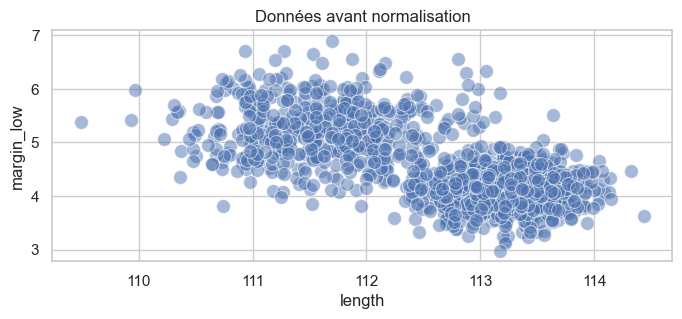

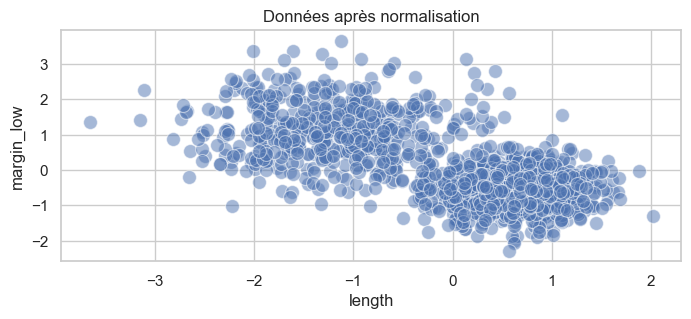

In [40]:
plt.figure(figsize=(8, 3))
sns.scatterplot(data=data, x='length', y='margin_low', s=100, alpha=.5)
plt.title('Données avant normalisation')
plt.savefig('Données avant normalisation.png')
plt.show()

plt.figure(figsize=(8, 3))
sns.scatterplot(data=data_norma, x='length', y='margin_low', s=100, alpha=.5)
plt.title('Données après normalisation')
plt.savefig('Données après normalisation.png')
plt.show()

### ACP 

Je vais réaliser une analyse en coomposantes principales sur mes données, pour avoir la variance globale de mes données.

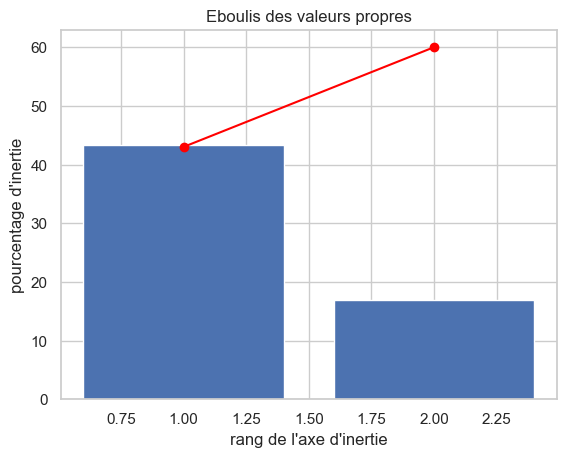

Variance expliquée : 60.2 %


In [41]:
n_components = 2
pca = PCA(n_components=n_components)
pca.fit(data_norma)

scree = (pca.explained_variance_ratio_*100).round(2)

scree_cum = scree.cumsum().round()

x_list = range(1, n_components+1)

plt.bar(x_list, scree)
plt.plot(x_list, scree_cum,c="red",marker='o')
plt.xlabel("rang de l'axe d'inertie")
plt.ylabel("pourcentage d'inertie")
plt.title("Eboulis des valeurs propres")
plt.savefig('Eboulis des valeurs propres.png')
plt.show(block=False)
print(
    'Variance expliquée :', 
    round(sum(pca.explained_variance_ratio_) * 100, 1), '%')

Je créer un dataframe avec les informations contenue dans les différentes composantes principale en fonction de mes variables.
Je vais chercher ma colonnes 'is_genuine' et la rapatrie dans le dataframe. Je renomme également mes composantes de de PC 1 et PC 2

In [42]:
features = data_norma.columns

pca = PCA(n_components=n_components)
data_acp = pca.fit_transform(data_norma)
df_acp = pd.DataFrame(data_acp)
df_acp.rename(columns = {0:'PC1',1:'PC2'}, inplace = True)
df_acp['is_genuine'] = data['is_genuine'][:, np.newaxis]

df_acp.head(5)

C:\Users\dltja\AppData\Local\Temp\ipykernel_16152\884045770.py:7: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  df_acp['is_genuine'] = data['is_genuine'][:, np.newaxis]


,PC1,PC2,is_genuine
0,-1.643904,0.747847,True
1,2.019997,-2.207486,True
2,0.969835,2.620747,True
3,1.377676,-1.818416,True
4,-0.148751,-0.566934,True


Je calcule les centroïdes de mes deux catégories et crée un dataframe avec mes centroïdes.

In [43]:
df_centroide = df_acp.groupby('is_genuine').mean()
df_centroide = df_centroide.reset_index()
df_centroide['is_genuine'] = df_centroide['is_genuine'].replace([True, False], 'centroide')
df_centroide

,is_genuine,PC1,PC2
0,centroide,-2.03570,-0.080207
1,centroide,1.01785,0.040104


Je concataine mon dataframe avec les centroïdes avec celui des valeurs de mes composantes principales.

In [44]:
df_acp = pd.concat([df_acp, df_centroide], ignore_index = True)
df_acp['size'] = df_acp['is_genuine'].apply(lambda x: 200 if x == "centroide" else 50)
df_acp

,PC1,PC2,is_genuine,size
0,-1.643904,0.747847,True,50
1,2.019997,-2.207486,True,50
2,0.969835,2.620747,True,50
3,1.377676,-1.818416,True,50
4,-0.148751,-0.566934,True,50
...,...,...,...,...
1497,-4.020229,-0.502726,False,50
1498,-2.778206,2.482165,False,50
1499,-2.115843,0.061871,False,50
1500,-2.035700,-0.080207,centroide,200


Je peux maintenant passer à l'affichage de mes cercle de coorélation qui vont me permettre de visulisé mes données.

In [45]:
def correlation_graph(pca, 
                      x_y, 
                      features) : 
    """Affiche le graphe des correlations

    Positional arguments : 
    -----------------------------------
    pca : sklearn.decomposition.PCA : notre objet PCA qui a été fit
    x_y : list ou tuple : le couple x,y des plans à afficher, exemple [0,1] pour F1, F2
    features : list ou tuple : la liste des features (ie des dimensions) à représenter
    """

    # Extrait x et y 
    x,y=x_y

    # Taille de l'image (en inches)
    fig, ax = plt.subplots(figsize=(10, 9))

    # Pour chaque composante : 
    for i in range(0, pca.components_.shape[1]):

        # Les flèches
        ax.arrow(0,0, 
                pca.components_[x, i],  
                pca.components_[y, i],  
                head_width=0.07,
                head_length=0.07, 
                width=0.02, )

        # Les labels
        plt.text(pca.components_[x, i] + 0.05,
                pca.components_[y, i] + 0.05,
                features[i])
        
    # Affichage des lignes horizontales et verticales
    plt.plot([-1, 1], [0, 0], color='grey', ls='--')
    plt.plot([0, 0], [-1, 1], color='grey', ls='--')

    # Nom des axes, avec le pourcentage d'inertie expliqué
    plt.xlabel('PC{} ({}%)'.format(x+1, round(100*pca.explained_variance_ratio_[x],1)))
    plt.ylabel('PC{} ({}%)'.format(y+1, round(100*pca.explained_variance_ratio_[y],1)))

    # J'ai copié collé le code sans le lire
    plt.title("Cercle des corrélations (PC{} et PC{})".format(x+1, y+1))

    # Le cercle 
    an = np.linspace(0, 2 * np.pi, 100)
    plt.plot(np.cos(an), np.sin(an))  # Add a unit circle for scale

    # Axes et display
    plt.axis('equal')
    plt.savefig('Cercle de corréalation.png')
    plt.show(block=False)

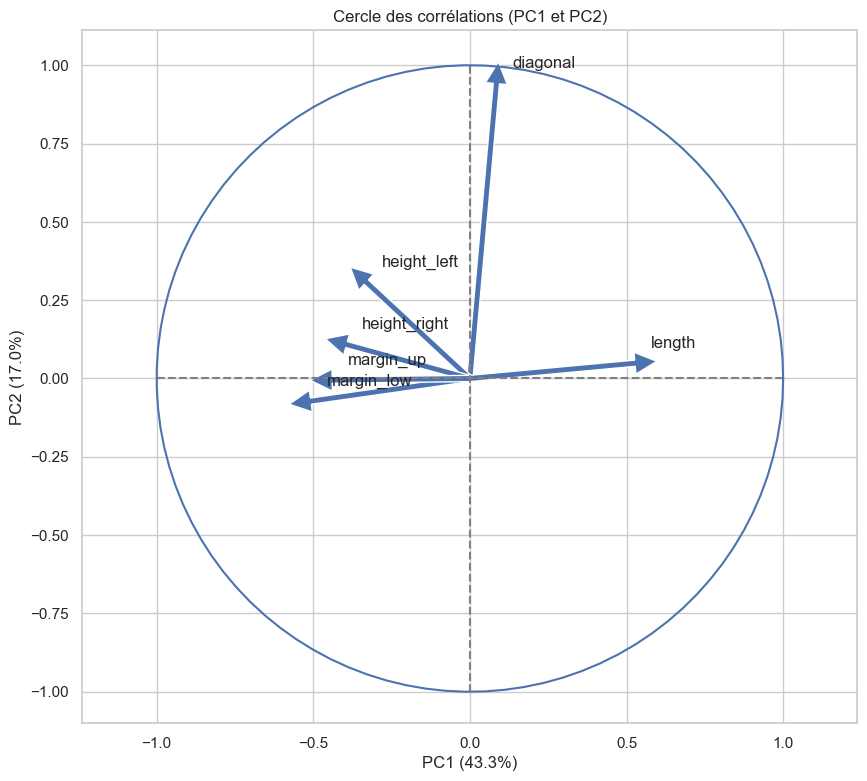

In [46]:
correlation_graph(pca, (0,1), features)

Les 2 variables les mieux représenter sont 'diagonal' et 'length', car les flèches de ces variables sont les plus grandes.
- L'axe des ordonnées est représenter par 'diagonal'
- L'axe des abscisses est représenter par 'length'

J'affiche les différents groupes avec leurs centroïdes.

In [47]:
def display_factorial_planes(   X_projected, 
                                x_y, 
                                pca=None, 
                                labels = None,
                                clusters=None, 
                                alpha=1,
                                figsize=[10,8], 
                                marker=".", 
                                data=None,  
                                size=None):
    """
    Affiche la projection des individus

    Positional arguments : 
    -------------------------------------
    X_projected : np.array, pd.DataFrame, list of list : la matrice des points projetés
    x_y : list ou tuple : le couple x,y des plans à afficher, exemple [0,1] pour F1, F2

    Optional arguments : 
    -------------------------------------
    pca : sklearn.decomposition.PCA : un objet PCA qui a été fit, cela nous permettra d'afficher la variance de chaque composante, default = None
    labels : list ou tuple : les labels des individus à projeter, default = None
    clusters : list ou tuple : la liste des clusters auquel appartient chaque individu, default = None
    alpha : float in [0,1] : paramètre de transparence, 0=100% transparent, 1=0% transparent, default = 1
    figsize : list ou tuple : couple width, height qui définit la taille de la figure en inches, default = [10,8] 
    marker : str : le type de marker utilisé pour représenter les individus, points croix etc etc, default = "."
    """

    # Transforme X_projected en np.array
    X_ = np.array(X_projected)

    # On définit la forme de la figure si elle n'a pas été donnée
    if not figsize: 
        figsize = (7,6)

    # On gère les labels
    if  labels is None : 
        labels = []
    try : 
        len(labels)
    except Exception as e : 
        raise e

    # On vérifie la variable axis 
    if not len(x_y) ==2 : 
        raise AttributeError("2 axes sont demandées")   
    if max(x_y )>= X_.shape[1] : 
        raise AttributeError("la variable axis n'est pas bonne")   

    # on définit x et y 
    x, y = x_y

    # Initialisation de la figure       
    fig, ax = plt.subplots(1, 1, figsize=figsize)

    # On vérifie s'il y a des clusters ou non
    c = None if clusters is None else clusters
    
     # Gestion dynamique de la taille des points
    if data is not None and size is not None:
        if size not in data.columns:
            raise ValueError(f"La colonne '{size}' n'existe pas dans le DataFrame fourni.")
        sizes = data[size]  # Utilisation de la colonne dynamique
    else:
        sizes = None  # Par défaut aucune taille dynamique
 
    # Les points    
    # plt.scatter(   X_[:, x], X_[:, y], alpha=alpha, 
    #                     c=c, cmap="Set1", marker=marker)
    sns.scatterplot(data=None, x=X_[:, x], y=X_[:, y], hue=c, size=sizes, sizes=(50, 200), palette = 'bright')
    
    # Si la variable pca a été fournie, on peut calculer le % de variance de chaque axe 
    if pca : 
        v1 = str(round(100*pca.explained_variance_ratio_[x]))  + " %"
        v2 = str(round(100*pca.explained_variance_ratio_[y]))  + " %"
    else : 
        v1=v2= ''

    # Nom des axes, avec le pourcentage d'inertie expliqué
    ax.set_xlabel(f'PC{x+1} {v1}')
    ax.set_ylabel(f'PC{y+1} {v2}')

    # Valeur x max et y max
    x_max = np.abs(X_[:, x]).max() *1.1
    y_max = np.abs(X_[:, y]).max() *1.1

    # On borne x et y 
    ax.set_xlim(left=-x_max, right=x_max)
    ax.set_ylim(bottom= -y_max, top=y_max)

    # Affichage des lignes horizontales et verticales
    plt.plot([-x_max, x_max], [0, 0], color='grey', alpha=0.8)
    plt.plot([0,0], [-y_max, y_max], color='grey', alpha=0.8)

    # Affichage des labels des points
    if len(labels) : 
        for i,(_x,_y) in enumerate(X_[:,[x,y]]):
            plt.text(_x, _y+0.05, labels[i], fontsize='14', ha='center',va='center') 

    # Titre et display
    plt.title(f"Projection des individus (sur PC{x+1} et PC{y+1})")
    plt.savefig('Projection des individus.png')
    plt.show()

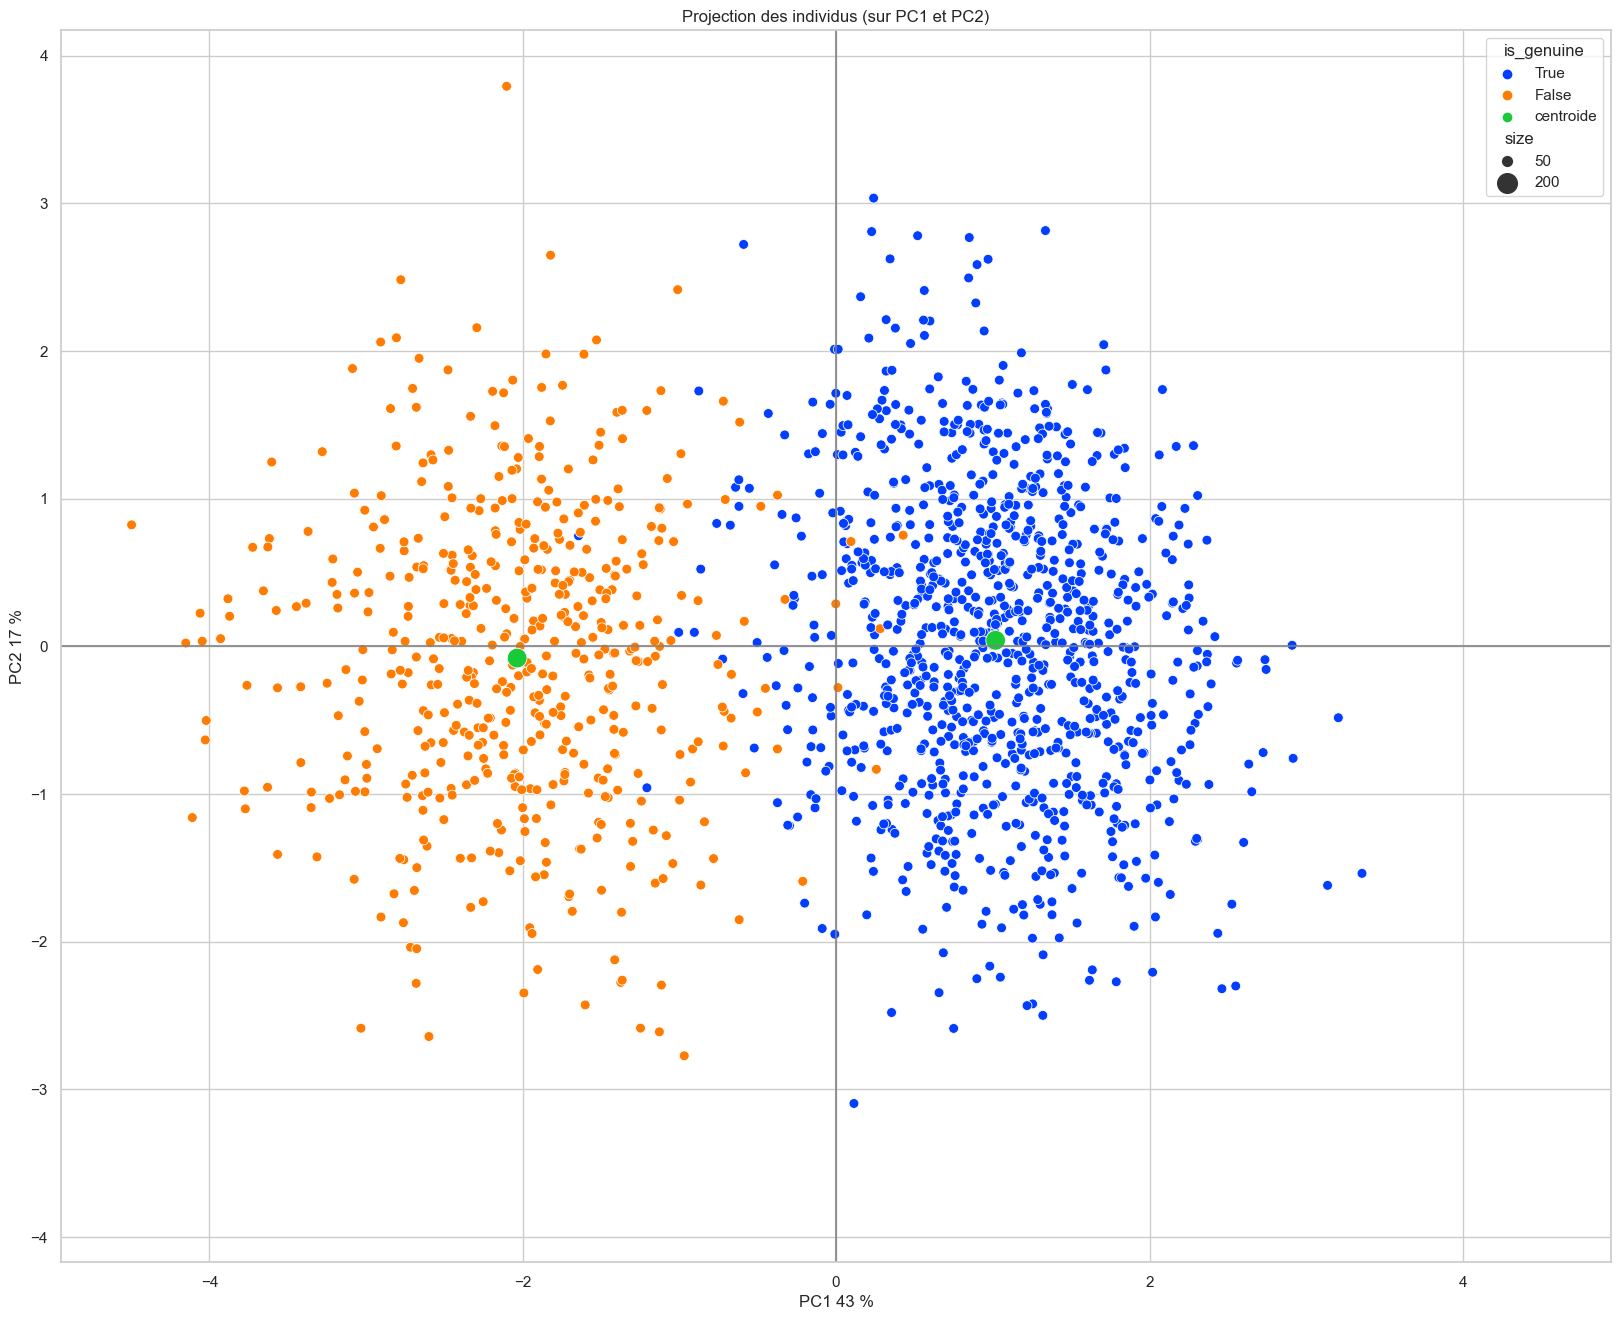

In [48]:
x_y = [0, 1]

display_factorial_planes(
    X_projected=df_acp, 
    x_y=x_y, 
    pca=pca, 
    figsize=(20, 16), 
    clusters=df_acp.is_genuine, 
    marker="o", 
    data=df_acp, 
    size ='size'  
)

On constate que l'on distingue bien nos 2 groupes (vrai billets et faux billets) sur nos 2 premières composantes.
- Les vrais billets ce concentrent sur le coté gauche
- Les faux billets ce concentrent sur le coté droit

On peux constater une zone "d'insertitude" qui est la zone de contact entre les 2 groupes.

Les billets sont le plus différentier grace à leur longueur (length), car c'est cette variable qui est le mieu représenter sur l'axe des abscisses.


### Classification supervisée : K-Means

On utilise 2 méthode pour trouver le nombre de cluster adapté :

- la méthode du coude
- le score silhouette

Je défini une liste vide pour sotcker nos inerties. Ensuite la liste du nombre de clusters que l'on veut tester.

In [49]:
intertia = []
sil_score = []

##### 1) Méthode du coude

On défini la liste du nombre de clusters que l'on veut tester et pour chaque valeur de k, on entraine un k-means spécifique et on stocke son inertie. 

In [50]:
k_list = range(1, 10)

for i in k_list :
  kmeans = KMeans(n_clusters=i)
  kmeans.fit(data_norma) 
  intertia.append(kmeans.inertia_)

C:\Users\dltja\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=6.
  warnings.warn(
C:\Users\dltja\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=6.
  warnings.warn(
C:\Users\dltja\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=6.
  warnings.warn(
C:\Users\dltja\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Window

J'affiche ma liste des inerties. 

In [51]:
intertia

[9000.0,
 5805.150216315369,
 5091.271381587684,
 4680.352087283702,
 4426.72003938873,
 4107.797192806995,
 4072.3207573711443,
 3818.7545114449053,
 3648.2513467278927]

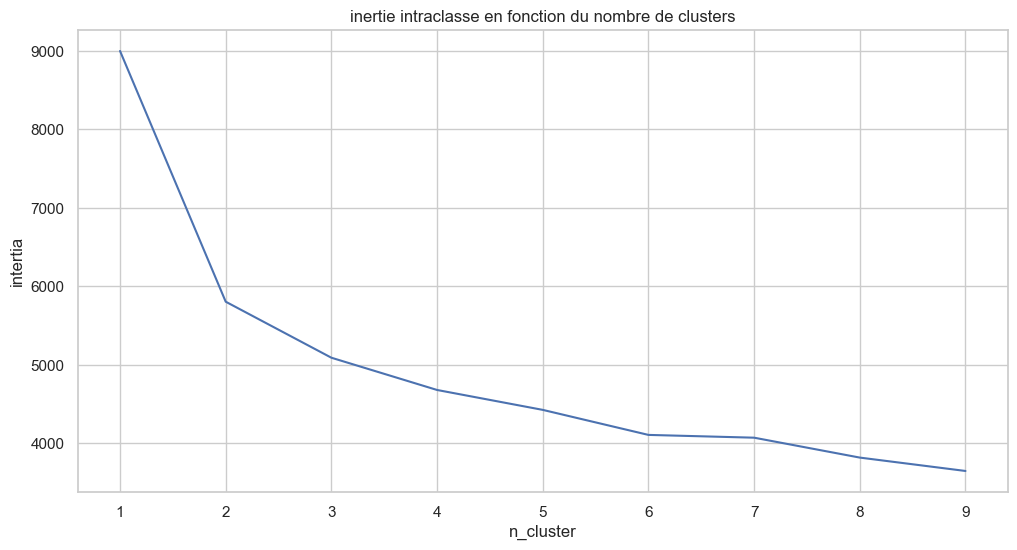

In [52]:
fig, ax = plt.subplots(1,1,figsize=(12,6))

ax.set_title("inertie intraclasse en fonction du nombre de clusters")
ax.set_ylabel("intertia")
ax.set_xlabel("n_cluster")
ax = plt.plot(k_list, intertia)
plt.savefig('K-means m-coudes.png')

On observe sur le graphique, que la plus grosse cassure ce trouve au niveau de 2 clusters.
Je pense donc lancé mon algorithme k-means pour qu'il m'identifie 2 clusters.
J'attends de voir si le score silhouette, valide mon nombre de clusters.

##### 2) Score silhouette

On défini la liste du nombre de clusters que l'on veut tester et pour chaque valeur de k, on entraine un k-means spécifique et on stocke son inertie. 

In [53]:
ks_list = range(2, 10)

for i in ks_list :
  kmeans = KMeans(n_clusters=i)
  kmeans.fit(data_norma) 
  sil_score.append(silhouette_score(data_norma,kmeans.labels_))

C:\Users\dltja\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=6.
  warnings.warn(
C:\Users\dltja\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=6.
  warnings.warn(
C:\Users\dltja\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=6.
  warnings.warn(
C:\Users\dltja\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Window

J'affiche ma liste des inerties. 

In [54]:
intertia

[9000.0,
 5805.150216315369,
 5091.271381587684,
 4680.352087283702,
 4426.72003938873,
 4107.797192806995,
 4072.3207573711443,
 3818.7545114449053,
 3648.2513467278927]

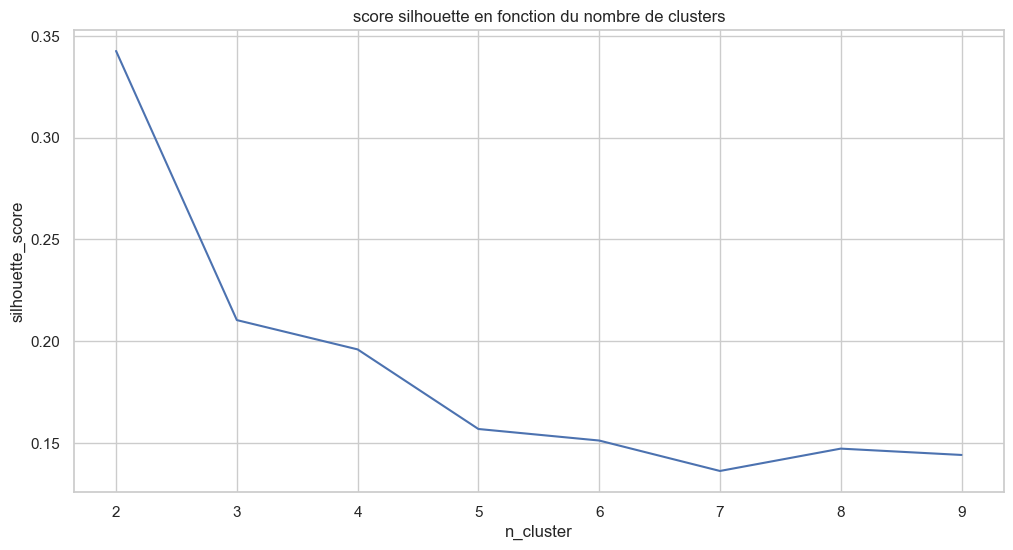

In [55]:
fig, ax = plt.subplots(1,1,figsize=(12,6))

ax.set_title("score silhouette en fonction du nombre de clusters")
ax.set_ylabel("silhouette_score")
ax.set_xlabel("n_cluster")
ax = plt.plot(ks_list, sil_score)
plt.savefig('K-means m-score_silhouette.png')

On observe sur le graphique, que on obtient le plus gros score à 2 clusters.
___

Je choisie donc d'utiliser le nombre de 2 cluster pour le K-Means

y est la variable à prédire

In [56]:
y = data['is_genuine']
y

0      True
1      True
2      True
3      True
4      True
      ...  
32    False
33    False
34    False
35    False
36    False
Name: is_genuine, Length: 1500, dtype: bool

Séparation des données d'entrainement et des données test

In [57]:
X_train, X_test, y_train, y_test = sk.model_selection.train_test_split(data_norma, y, test_size=0.33)

print('X_train :', len(X_train), 'lignes',
    '\ny_train :', len(y_train), 'lignes',
    '\nX_test :', len(X_test), 'lignes',
    '\ny_test :', len(y_test), 'lignes')

X_train : 1005 lignes 
y_train : 1005 lignes 
X_test : 495 lignes 
y_test : 495 lignes


On définit le cnombre de cluster à 2 et on entraine

In [58]:
kmeans = sk.cluster.KMeans(n_clusters=2, random_state=0).fit(X_train, y_train)

C:\Users\dltja\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=4.
  warnings.warn(


Il faut réalisé les prédictions sur l'échantillon-test. 

In [59]:
y_kmean = kmeans.predict(X_test)
y_kmean[:5]

array([1, 0, 1, 0, 0])

Je remplace les valeurs False, True par 1, 2.

In [60]:
y_test = y_test.replace([False, True], [1, 2]).reset_index()
y_test

,index,is_genuine
0,1014,1
1,494,2
2,1428,1
3,129,2
4,25,2
...,...,...
490,173,2
491,659,2
492,982,2
493,885,2


J'isole mes données.

In [61]:
ytest = y_test['is_genuine']
ytest

0      1
1      2
2      1
3      2
4      2
      ..
490    2
491    2
492    2
493    2
494    2
Name: is_genuine, Length: 495, dtype: int64

Je réduis les dimentions des mes données du K-means avec une ACP à 2 composants 

In [62]:
data_acp_kmeans = pca.fit_transform(X_test)
df_acp_kmeans = pd.DataFrame(data_acp_kmeans)
df_acp_kmeans.rename(columns = {0:'PC1',1:'PC2'}, inplace = True)
df_acp_kmeans

,PC1,PC2
0,-1.880324,-0.959306
1,0.890198,0.839587
2,-2.143868,1.088687
3,1.078589,0.178925
4,2.350690,-0.031862
...,...,...
490,1.712079,2.124709
491,2.828385,-0.434144
492,1.262832,-0.711273
493,0.149558,-0.475428


Dataframe du K-Means

In [63]:
df_kmeans = df_acp_kmeans
df_kmeans['cluster'] = y_kmean
df_kmeans

,PC1,PC2,cluster
0,-1.880324,-0.959306,1
1,0.890198,0.839587,0
2,-2.143868,1.088687,1
3,1.078589,0.178925,0
4,2.350690,-0.031862,0
...,...,...,...
490,1.712079,2.124709,0
491,2.828385,-0.434144,0
492,1.262832,-0.711273,0
493,0.149558,-0.475428,0


Création du Dataframe des centroides

In [64]:
df_centroide_kmeans = df_kmeans.groupby('cluster').mean()
df_centroide_kmeans = df_centroide_kmeans.reset_index()
df_centroide_kmeans['cluster'] = df_centroide_kmeans['cluster'].replace([0, 1], 'centroide')
df_centroide_kmeans

,cluster,PC1,PC2
0,centroide,1.069633,0.031557
1,centroide,-2.100836,-0.061980


Concaténation des 2 DataFrame

In [65]:
df_kmeans = pd.concat([df_kmeans, df_centroide_kmeans], ignore_index = True)
df_kmeans['size'] = df_kmeans['cluster'].apply(lambda x: 200 if x == "centroide" else 50)
df_kmeans

,PC1,PC2,cluster,size
0,-1.880324,-0.959306,1,50
1,0.890198,0.839587,0,50
2,-2.143868,1.088687,1,50
3,1.078589,0.178925,0,50
4,2.350690,-0.031862,0,50
...,...,...,...,...
492,1.262832,-0.711273,0,50
493,0.149558,-0.475428,0,50
494,1.242865,1.620046,0,50
495,1.069633,0.031557,centroide,200


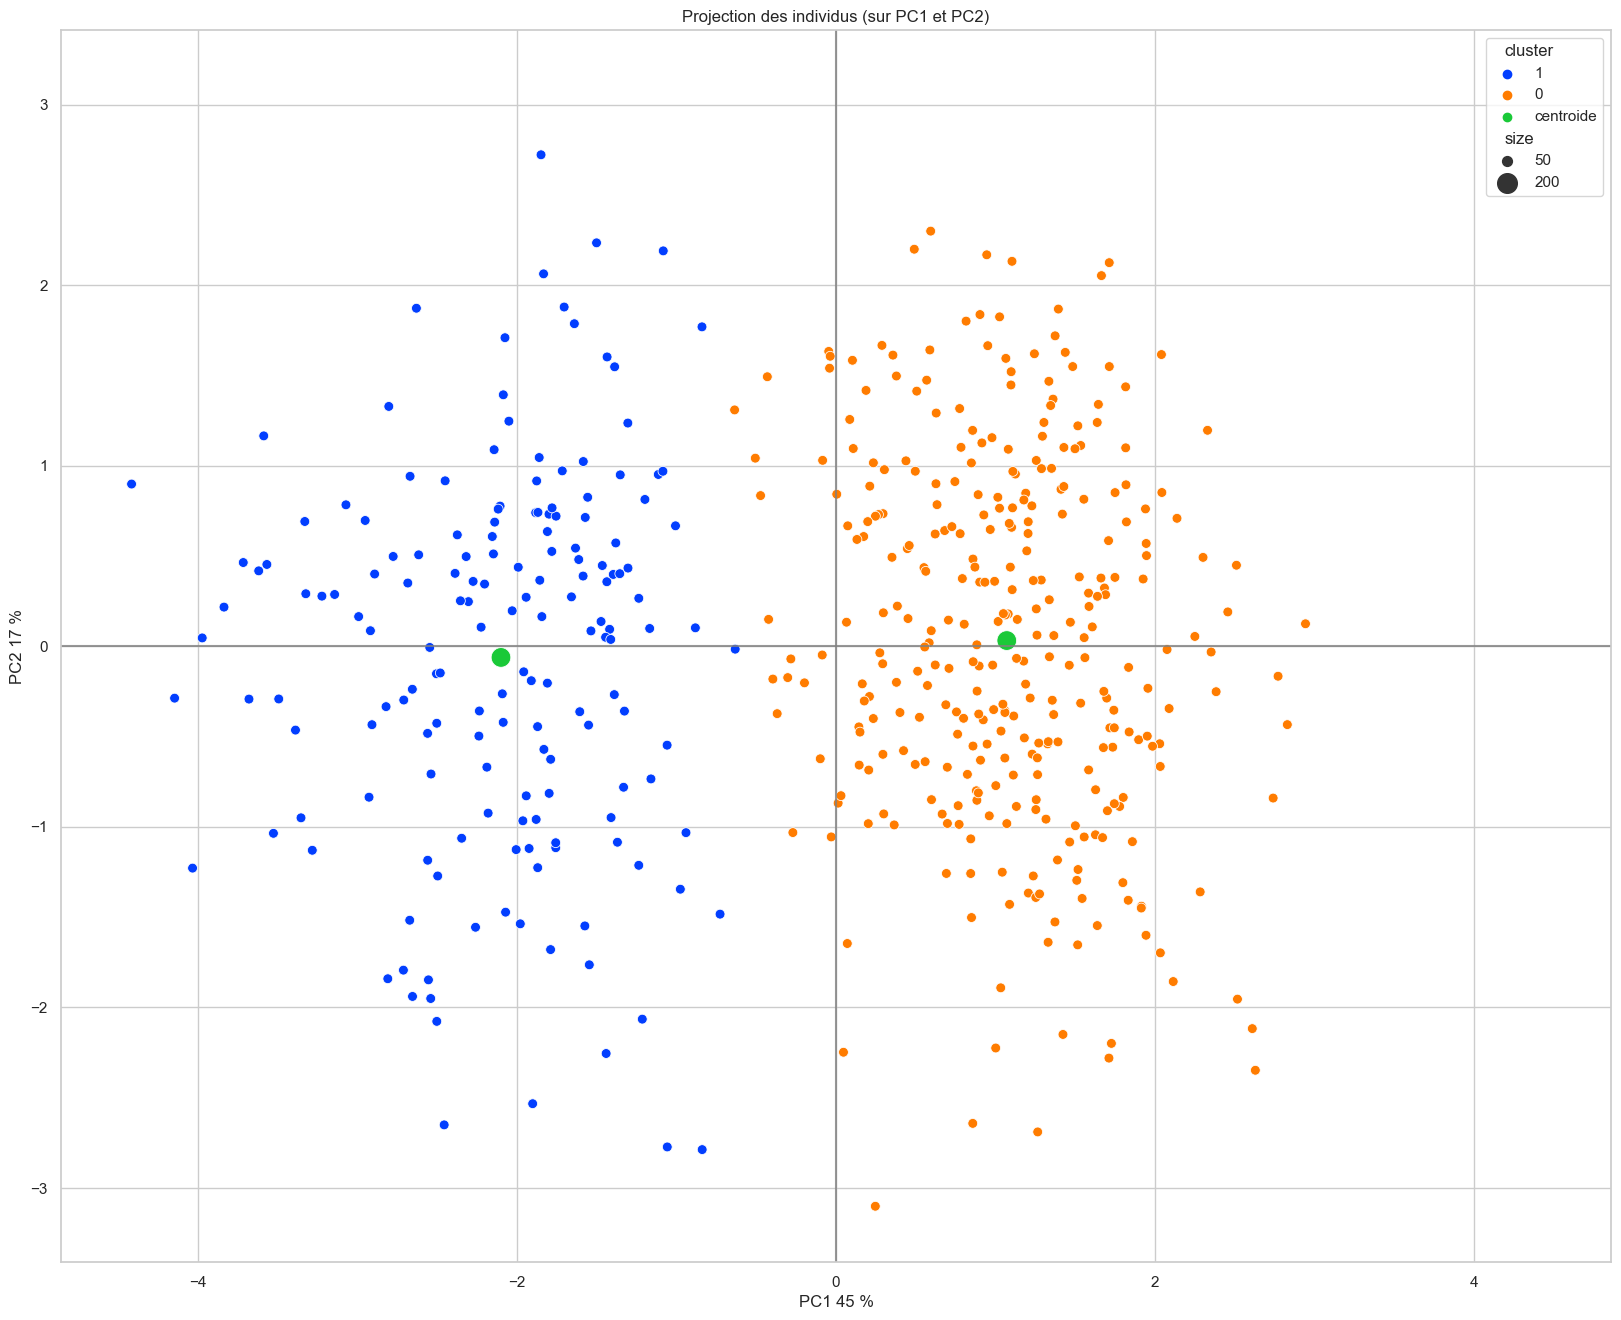

In [66]:
x_y = [0, 1]

display_factorial_planes(
    X_projected=df_kmeans, 
    x_y=x_y, 
    pca=pca, 
    figsize=(20, 16), 
    clusters=df_kmeans.cluster, 
    marker="o", 
    data=df_kmeans, 
    size ='size'  
)

On constate bien nos 2 groupes sur nos 2 premières composantes.
___
- Les centroides crée par le K-Means sont proche à ceux des données de base
- Les groupes sont très ressemblent à ceux des données de base
- La zone "d'insertitude" n'éxiste plus ! On voit une limite entre les 2 groupes !

Suppression des centroides pour comparer les groupes de base aux groupes crée par le K-Means

In [67]:
df_kmeans.drop(df_kmeans.loc[df_kmeans['cluster']=='centroide'].index, inplace=True)
df_kmeans['cluster'] = df_kmeans['cluster'].replace([0], [2])
df_kmeans['is_genuine'] = ytest
df_kmeans

,PC1,PC2,cluster,size,is_genuine
0,-1.880324,-0.959306,1,50,1
1,0.890198,0.839587,2,50,2
2,-2.143868,1.088687,1,50,1
3,1.078589,0.178925,2,50,2
4,2.350690,-0.031862,2,50,2
...,...,...,...,...,...
490,1.712079,2.124709,2,50,2
491,2.828385,-0.434144,2,50,2
492,1.262832,-0.711273,2,50,2
493,0.149558,-0.475428,2,50,2


La matrice de confusion va nous permettre d'évaluer les résultat du K-Means par rapport à nos données de base. 

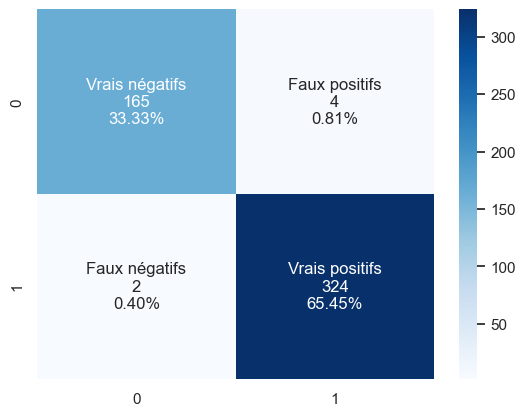

              precision    recall  f1-score   support

           1       0.99      0.98      0.98       169
           2       0.99      0.99      0.99       326

    accuracy                           0.99       495
   macro avg       0.99      0.99      0.99       495
weighted avg       0.99      0.99      0.99       495



In [68]:
def matrice_confusion(a, b, nom_graphique):
    confusion_matrix = sk.metrics.confusion_matrix(a,b)
    group_names = ['Vrais négatifs','Faux positifs','Faux négatifs','Vrais positifs']
    group_counts = ['{0:0.0f}'.format(value) for value in confusion_matrix.flatten()]
    group_percentages = [
        '{0:.2%}'.format(value) for value in confusion_matrix.flatten()/np.sum(confusion_matrix)]
    labels = [f'{v1}\n{v2}\n{v3}' for v1, v2, v3 in
              zip(group_names, group_counts, group_percentages)]
    labels = np.asarray(labels).reshape(2,2)
    sns.heatmap(confusion_matrix, annot=labels, fmt='', cmap='Blues')
    plt.show()
    
    classification = sk.metrics.classification_report(a,b)
    print(classification)
    
matrice_confusion(df_kmeans['is_genuine'], df_kmeans['cluster'], 'kmeans_matrice-confusion')

- 4 billets on été considérer comme vrais alors qu'ils étaient faux !
- 5 billets on été considérer comme faux alors qu'ils étaient vrais !
- 1,82% des données mal prédit !

Accuracy : Cet indicateur nous indique le pourcentage de prédictions correctes que notre modèle a réalisé sur l'ensemble de données de test. Plus la précision est élevée, meilleur est notre modèle.

**Accuracy : 98% de prédictions correctes !**

## Regression logistique 

#### 1) Regression logistique avec mes données classique 

In [69]:
import sklearn
from sklearn.linear_model import LogisticRegression
import scipy.stats
import scipy.stats as stats
from sklearn import preprocessing
import numpy as np
from sklearn.metrics import roc_auc_score, accuracy_score, confusion_matrix, classification_report
from scipy.stats import chi2

y est la variable à prédire

In [70]:
X = data[['diagonal', 'height_left', 'height_right', 'margin_up', 'length']]  

In [71]:
y = data['is_genuine']

Pour mes données test et d'entrainement je prends directement mes données sans la variable à prédire.

In [72]:
X_train, X_test, y_train, y_test = train_test_split(data_exp, y, test_size=0.33)

print('X_train :', len(X_train), 'lignes',
      '\ny_train :', len(y_train), 'lignes',
      '\nX_test :', len(X_test), 'lignes',
      '\ny_test :', len(y_test), 'lignes')

X_train : 1005 lignes 
y_train : 1005 lignes 
X_test : 495 lignes 
y_test : 495 lignes


- 2/3 des données pour l'entrainement
- 1/3 des données pour le test

Etablissement du modèle de régression logistique ainsi que l'entraînement de celle-ci

In [73]:
lrSk = LogisticRegression(penalty=None)
lrSk.fit(X_train,y_train)
print('Constante :',lrSk.intercept_.round(2))
print('R² :', lrSk.score(X_train,y_train))
print('Coef :') 
print(pd.DataFrame({"var":X_train.columns,"coef":lrSk.coef_[0]}))

Constante : [-0.07]
R² : 0.9920398009950249
Coef :
            var       coef
0      diagonal  -1.197202
1   height_left  -2.887532
2  height_right  -3.466021
3    margin_low  -7.413245
4     margin_up -13.489215
5        length   8.386409


Constante : 
- Elle correspond à la valeur prédite soit -0.03 par le modèle lorsque toutes les variables explicatives sont nulles.
- Une valeur proche de zéro pour la constante est courante dans les modèles bien ajustés. Cela indique que le modèle ne s'appuie pas excessivement sur un décalage fixe pour expliquer la variable cible.

Coef : 
- Il indique la pente de chaque variable sur la variable cible ainsi que la corrélation avec celle-ci.
- Les 5 coefs négatifs des pentes indiquent une coorélation négative avec les variables diagonal, height_left, height_right, margin_low, margin_up.
- Le coef positif de la pente indique une coorélation positives avec la variable length.


R² :  
- Il mesure la proportion de la variance de la variable cible expliquée par le modèle.
- Ici, R²=0.993 soit 99,3 % de la variance de la variable à prédire est expliquée par les variables explicatives. 
---

Ce modèle est très performant.

In [74]:
desc = stats.describe(X_train,axis=0,ddof=0)
stats_df = pd.DataFrame({
    "Variable": X_train.columns,
    "Min": desc.minmax[0],
    "Max": desc.minmax[1],
    "Moyenne": desc.mean,
    "Variance": desc.variance,
    "Skewness": desc.skewness,
    "Kurtosis": desc.kurtosis})
stats_df

,Variable,Min,Max,Moyenne,Variance,Skewness,Kurtosis
0,diagonal,171.04,172.92,171.955672,0.095234,-0.126830,-0.148779
1,height_left,103.20,104.88,104.032716,0.090912,-0.129204,-0.181021
2,height_right,102.82,104.95,103.920448,0.103939,-0.014150,-0.021052
3,margin_low,2.98,6.90,4.476358,0.437026,0.851564,0.194238
4,margin_up,2.27,3.91,3.151701,0.053615,0.139281,-0.144096
5,length,109.93,114.32,112.681144,0.746163,-0.825574,-0.234342


**Analyse des statistiques descriptives :**

- **Nombre d'observations :** 1005 observations, ce qui est suffisant pour entraîner un modèle robuste.
- **Minimum et maximum :** Les variables présentent des plages de valeurs raisonnables. Cela montre une bonne dispersion des données, sans valeurs extrêmes ou aberrantes dans les variables.
- **Moyennes :** Les moyennes des variables sont assez proches des valeurs centrales pour chaque colonne, ce qui montre que les données sont relativement bien centrées autour de leur moyenne.

- **Variances :** Les variances varient entre 0.05 et 0.77, indiquant que les variables ont des dispersions relativement modérées autour de leur moyenne. Par exemple, "margin_up" présente une variance de 0.05 (très faible), tandis que "length" a une variance plus élevée de 0.78.
        Cela signifie qu'il n'y a pas de domination excessive d'une variable, et que chaque variable contribue de manière équilibrée à la dispersion des données.

- **Asymétrie (Skewness) :** L'asymétrie des variables est globalement modérée :
  - Asymétrie positive (queue vers la droite) : "margin_low" présente une asymétrie de 0.81, ce qui indique une légère tendance à avoir des valeurs plus faibles.
  - Asymétrie négative (queue vers la gauche) : "length" a une asymétrie de -0.87, ce qui montre une légère tendance à avoir plus de valeurs élevées.
  - Les autres variables, comme "diagonal", "height_left" et "height_right", ont des asymétries proches de zéro, ce qui indique une distribution proche de la normale.

- **Aplatissement (Kurtosis) :** L'aplatissement des variables montre une distribution modérément normale, avec quelques variations :
  - Kurtosis négatif : "diagonal", "height_left", "margin_up" et "length" montrent un aplatissement négatif, ce qui signifie des distributions plus plates, où les valeurs sont plus dispersées.
  - Kurtosis positif : "height_right" et "margin_low" montrent un aplatissement positif, ce qui signifie que leurs distributions sont plus concentrées autour de la moyenne.

**Conclusion :** 
- Les données montrent une bonne dispersion et une centration autour de la moyenne, avec des variances modérées et des asymétries et kurtosis généralement faibles, ce qui signifie que les données ne sont pas excessivement biaisées ou extrêmes. 
- Le modèle semble bien adapté à ces données sans nécessiter de transformations majeures. 
- Les distributions des variables sont suffisamment équilibrées pour ne pas poser de problème pour le modèles.

Je souhaite afficher les probabilité prédites grâce à ma régression logistique.

In [75]:
proba01 = lrSk.predict_proba(X_train)
proba1 = proba01[:,1]

print(proba01[:5,:])
print(scipy.stats.describe(proba1))

[[9.99842056e-01 1.57943891e-04]
 [9.99999977e-01 2.31345568e-08]
 [2.13789692e-05 9.99978621e-01]
 [2.79455708e-07 9.99999721e-01]
 [1.00000000e+00 3.28530184e-11]]
DescribeResult(nobs=1005, minmax=(3.8917847525457347e-16, 0.9999999999964135), mean=0.6686613609376859, variance=0.21577414528968716, skewness=-0.7216092718991037, kurtosis=-1.4587656325571483)


Les résultats proche de 1 sont affectée à la classe 1 

**Analyse des statistiques descriptives :**

- **Nombre d'observations :** 1005 observations, ce qui est suffisant pour entraîner un modèle robuste.
- **Minimum et maximum :** 
  - Le minimum est très proche de 0, les observations ont donc une appartenance à la classe est quasiment nulle.
  - Le maximun est vraiment proche de 1, les observations ont donc une forte probabilité d'appartenance à la classe 1.
  - Les probabilités prodites couvrent toute la plage possible entre 0 et 1, ce qui est attendu d'une régression logistique.


- **Moyennes :** Les moyennes est de 0.6736, la probabilité moyenne prédite est de 67.36 %. Le modèle prédit une probalibilité d'appartenance plus élevé pour la classe 1 dit positive.


- **Variances :** La variance est de 0.2149, la dispersion est relativement faible des probabilités autour de la moyenne. 


- **Asymétrie (Skewness) :**
  - Il indique une asymétrie négative (queue vers la gauche, skewness < 0).
  - Les prédictions sont plus souvent proche de la classe 1 dite classe positive que l'inverse.


- **Aplatissement (Kurtosis) :**
  - Il est négatif, indiquant des distributions plates avec des valeurs plus étalées.
  - Il y a un certain nombre de valeurs éloignées de la moyenne sans pour autant avoir une concentration excessive autour d'elle.


**Conclusion :**
Les statistiques descriptives montrent que : 
 - le modèle est bien calibré, avec des prédictions bien étalé entre 0 et 1,
 - la moyenne élevée, indique un penchant à la prédiction vers la classe positive,
 - l'asymétrie négative et la kurtosis plate prouve que le modèle produit une distribution des probabilités diversifiée, que qui est une bonne choses.

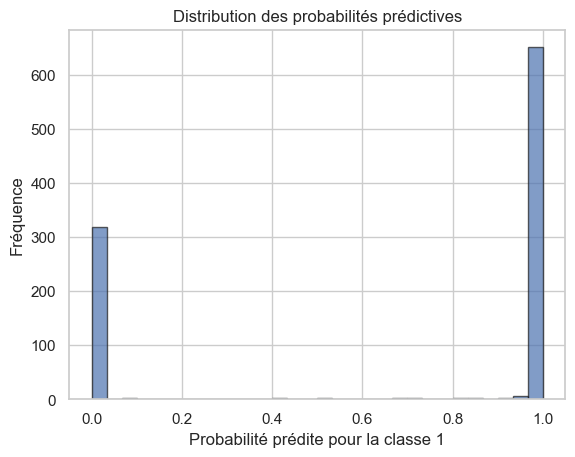

In [76]:
plt.hist(proba1, bins=30, edgecolor='k', alpha=0.7)
plt.title("Distribution des probabilités prédictives")
plt.xlabel("Probabilité prédite pour la classe 1")
plt.ylabel("Fréquence")
plt.savefig('Probabilité prédite pour la classe 1.png')
plt.show()

Pour confirmer mes résultats précédents, je calcule une log-vraisemblance qui permets d'évaluer la performance d'un modèle.

In [77]:
log_likelihood = np.sum(y_train*np.log(proba1)+(1.0-y_train)*np.log(1.0-proba1))
print(log_likelihood)

-20.77329630929669


Au vu des 1005 observations le log_likelihood semble bon. Le modèle produit donc bien des probabilités qui s'ajustent.

#### 2) Regression logistique avec mes données normalisées

Certain modèle sont sensibles  aux différentes échelles de données donc je vais normalisé mes données pour la suite de mes analyses.

In [78]:
N_train = std_scale.fit_transform(X_train)
desc = stats.describe(N_train,axis=0,ddof=0)
stats_df = pd.DataFrame({
    "Variable": X_train.columns,
    "Min": desc.minmax[0],
    "Max": desc.minmax[1],
    "Moyenne": desc.mean,
    "Variance": desc.variance,
    "Skewness": desc.skewness,
    "Kurtosis": desc.kurtosis})
stats_df

,Variable,Min,Max,Moyenne,Variance,Skewness,Kurtosis
0,diagonal,-2.967187,3.124856,1.017384e-14,1.0,-0.126830,-0.148779
1,height_left,-2.761771,2.810084,-7.086427e-15,1.0,-0.129204,-0.181021
2,height_right,-3.413351,3.193449,1.082429e-14,1.0,-0.014150,-0.021052
3,margin_low,-2.263507,3.666188,-2.863381e-16,1.0,0.851564,0.194238
4,margin_up,-3.807841,3.274895,-1.067582e-15,1.0,0.139281,-0.144096
5,length,-3.184906,1.897248,3.641090e-16,1.0,-0.825574,-0.234342


**Analyse des statistiques descriptives :**

- **Nombre d'observations :** 1005 observations, ce qui est suffisant pour entraîner un modèle robuste.

- **Minimum et maximum :** Les variables normalisées ont des valeurs minimum et maximum qui restent dans une plage raisonnable. Ces plages sont caractéristiques de données normalisées où certaines observations peuvent s'écarter légèrement de la moyenne sans être aberrantes.

- **Moyennes :** Les moyennes de toutes les variables sont très proches de zéro, ce qui est attendu pour des données centrées lors de la normalisation.

- **Variances :** Toutes les variables présentent une variance de 1, ce qui est conforme à une normalisation.

- **Asymétrie (Skewness) :** L'asymétrie est modérée pour toutes les variables, montrant des distributions proches de la normale :
  - Asymétrie positive (queue vers la droite) : "margin_low" (0.81) et "margin_up" (0.14) montrent des distributions légèrement inclinées vers des valeurs faibles.
  - Asymétrie négative (queue vers la gauche) : "length" (-0.87) et "height_left" (-0.12) ont des distributions légèrement inclinées vers des valeurs élevées.
  - Les autres variables, comme "diagonal" et "height_right", ont des asymétries proches de zéro, indiquant une symétrie acceptable.

- **Aplatissement (Kurtosis) :** Les distributions sont modérément normales :
  - Kurtosis négatif (distributions plates) : La plupart des variables, comme "diagonal", "height_left", et "length", présentent des distributions un peu plus dispersées autour de leur moyenne.
  - Kurtosis positif (distributions pointues) : "margin_low" (0.067) et "height_right" (0.008) ont des distributions légèrement concentrées autour de leur moyenne, mais ces valeurs restent négligeables.

**Conclusion :** 
- Les données normalisées sont parfaitement centrées, avec des moyennes proches de zéro et des variances égales à 1. 
- Les asymétries et les kurtosis sont globalement faibles, indiquant des distributions équilibrées sans biais significatif. 
- Ces caractéristiques assurent une compatibilité optimale avec des modèles linéaires ou des algorithmes sensibles à l’échelle des données, sans nécessiter d'autres transformations.


Etablissement du modèle de régression logistique ainsi que l'entraînement de celle-ci avec mes données normalisées

In [79]:
lrSkN = LogisticRegression(penalty=None)
lrSkN.fit(N_train,y_train)
print('Constante :',lrSkN.intercept_.round(2))
print('R² :', lrSkN.score(N_train,y_train))
print('Coef :') 
print(pd.DataFrame({"var":X_train.columns,"coef":lrSkN.coef_[0]}))

Constante : [2.72]
R² : 0.9920398009950249
Coef :
            var      coef
0      diagonal  0.274198
1   height_left -0.819416
2  height_right -0.788474
3    margin_low -4.843831
4     margin_up -3.321295
5        length  8.016194


Constante : 
- Elle correspond à la valeur prédite soit 2.81 par le modèle lorsque toutes les variables explicatives sont nulles.
- Une constante relativement élevée peut indiquer un décalage de la moyenne de la variable cible, ou que d'autres facteurs non inclus dans le modèle influencent la valeur prédite.

Coef : 
- Il indique la pente de chaque variable sur la variable cible ainsi que la corrélation avec celle-ci.
- Les 5 coefs négatifs des pentes indiquent une coorélation négative avec les variables diagonal, height_left, height_right, margin_low, margin_up.
- Le coef positif de la pente indique une coorélation positives avec la variable length.


R² :  
- Il mesure la proportion de la variance de la variable cible expliquée par le modèle.
- Ici, R²=0.674 soit 67,4 % de la variance de la variable à prédire est expliquée par les variables explicatives. 
---

Ce modèle est modérément performant.

Je souhaite afficher les probabilité prédites grâce à ma régression logistique.

In [80]:
proba01N = lrSkN.predict_proba(N_train)
proba1N = proba01N[:,1]

print(proba01[:5,:])
print(scipy.stats.describe(proba1N))

[[9.99842056e-01 1.57943891e-04]
 [9.99999977e-01 2.31345568e-08]
 [2.13789692e-05 9.99978621e-01]
 [2.79455708e-07 9.99999721e-01]
 [1.00000000e+00 3.28530184e-11]]
DescribeResult(nobs=1005, minmax=(4.9673583265721277e-17, 0.9999999999987887), mean=0.668587144140973, variance=0.21616612394075077, skewness=-0.7231143391040484, kurtosis=-1.4580686933182139)


Les résultats proche de 1 sont affectée à la classe 1 

**Analyse des statistiques descriptives :**

- **Nombre d'observations :** 1005 observations, ce qui est suffisant pour entraîner un modèle robuste.
- **Minimum et maximum :** 
  - Le minimum est très proche de 0, les observations ont donc une appartenance à la classe est quasiment nulle.
  - Le maximun est vraiment proche de 1, les observations ont donc une forte probabilité d'appartenance à la classe 1.
  - Les probabilités prodites couvrent toute la plage possible entre 0 et 1, ce qui est attendu d'une régression logistique.


- **Moyennes :** Les moyennes est de 0.6736, la probabilité moyenne prédite est de 67.36 %. Le modèle prédit une probalibilité d'appartenance plus élevé pour la classe 1 dit positive.


- **Variances :** La variance est de 0.2149, la dispersion est relativement faible des probabilités autour de la moyenne. 


- **Asymétrie (Skewness) :**
  - Il indique une asymétrie négative (queue vers la gauche, skewness < 0).
  - Les prédictions sont plus souvent proche de la classe 1 dite classe positive que l'inverse.


- **Aplatissement (Kurtosis) :**
  - Il est négatif, indiquant des distributions plates avec des valeurs plus étalées.
  - Il y a un certain nombre de valeurs éloignées de la moyenne sans pour autant avoir une concentration excessive autour d'elle.


**Conclusion :**
Les statistiques descriptives montrent que : 
 - le modèle est bien calibré, avec des prédictions bien étalé entre 0 et 1,
 - la moyenne élevée, indique un penchant à la prédiction vers la classe positive,
 - l'asymétrie négative et la kurtosis plate prouve que le modèle produit une distribution des probabilités diversifiée, que qui est une bonne choses.

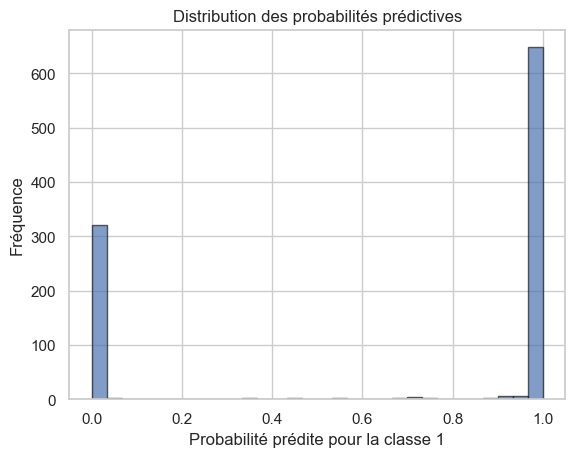

In [81]:
plt.hist(proba1N, bins=30, edgecolor='k', alpha=0.7)
plt.title("Distribution des probabilités prédictives")
plt.xlabel("Probabilité prédite pour la classe 1")
plt.ylabel("Fréquence")
plt.savefig('ProbabilitéN prédite pour la classe 1.png')
plt.show()

In [82]:
log_likelihoodN = np.sum(y_train*np.log(proba1N)+(1.0-y_train)*np.log(1.0-proba1N))
print(log_likelihoodN)

-19.45523086860596


Au vu des 1005 observations le log_likelihood semble bon. Le modèle produit donc bien des probabilités qui s'ajustent.

#### 3) Regression logistique validation


**Validation des hypothèses d'une régression logistique**

1. Linéarité entre prédicteurs et logit :
Optimization terminated successfully.
         Current function value: 0.069564
         Iterations 10
Test Harvey-Collier (linéarité) : p-value = nan
  => La relation semble non linéaire, une transformation des variables peut être nécessaire.

2. Indépendance des observations :
Optimization terminated successfully.
         Current function value: 0.069564
         Iterations 10
Statistique de Durbin-Watson : 1.7195676050073612
  => Indépendance des résidus confirmée.

3. Qualité d'ajustement :
AUC : 1.00
La courbe ROC est une représentation graphique de la performance de notre modèle en fonction de différents seuils de classification. Elle trace la sensibilité en fonction de la spécificité pour chaque seuil de classification possible. L'aire sous la courbe ROC mesure la qualité globale de notre modèle. Plus l'AUC est proche de 1, meilleur est notre modèle.


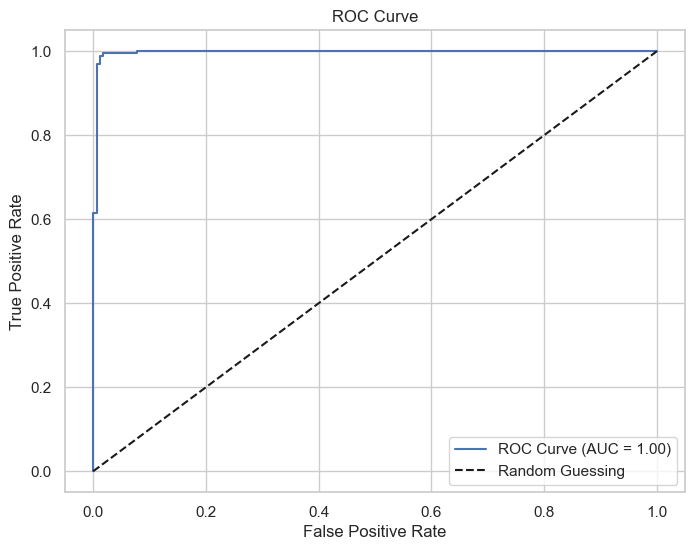


4. Pseudo-R² :
Pseudo-R² (McFadden) : 0.8922
Pseudo-R² (Cox-Snell) : 0.6788
Pseudo-R² (Nagelkerke) : 0.9428

5. Test du Khi-Deux :
Statistique du Khi-Deux : 1703.7570
P-valeur du Khi-Deux : 0.0000
  => Le modèle est significatif.

6. Test de Wald :
p-values pour les coefficients :
const           9.122377e-02
diagonal        2.261438e-02
height_left     1.760607e-04
height_right    2.837581e-07
margin_up       5.922362e-12
length          2.634951e-27
dtype: float64
  => Le coefficient de const n'est pas significatif.
  => Le coefficient de diagonal est significatif.
  => Le coefficient de height_left est significatif.
  => Le coefficient de height_right est significatif.
  => Le coefficient de margin_up est significatif.
  => Le coefficient de length est significatif.

7. Test du rapport de la déviance :
Différence de déviance : 1703.7570
P-value du test du rapport de la déviance : 0.0000
  => Le modèle est significatif selon le test du rapport de la déviance.


In [83]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.api import Logit
from scipy.stats import shapiro, probplot
from statsmodels.stats.diagnostic import linear_harvey_collier
from statsmodels.stats.stattools import durbin_watson
from statsmodels.api import Logit, add_constant


# Validation des hypothèses
def validate_hypotheses(X, y, model, X_test, y_test):
    print("\n**Validation des hypothèses d'une régression logistique**\n")
    
    # Ajouter une constante pour statsmodels
    X_const = add_constant(X)
    logit_model = Logit(y, X_const).fit(disp=False)

# 1. Linéarité entre prédicteurs et logit
    print("1. Linéarité entre prédicteurs et logit :")
    linear_test = linear_harvey_collier(Logit(y, X).fit())
    print(f"Test Harvey-Collier (linéarité) : p-value = {linear_test.pvalue}")
    if linear_test.pvalue > 0.05:
        print("  => La relation semble linéaire.")
    else:
        print("  => La relation semble non linéaire, une transformation des variables peut être nécessaire.")

# 2. Indépendance des observations
    print("\n2. Indépendance des observations :")
    dw_stat = durbin_watson(Logit(y, X).fit().resid_response)
    print(f"Statistique de Durbin-Watson : {dw_stat}")
    if 1.5 < dw_stat < 2.5:
        print("  => Indépendance des résidus confirmée.")
    else:
        print("  => Possible autocorrélation, vérifiez votre échantillon.")

# 3. Qualité d'ajustement (Goodness-of-Fit)
    print("\n3. Qualité d'ajustement :")
    y_pred = model.predict_proba(X_test)[:, 1]
    fpr, tpr, _ = roc_curve(y_test, y_pred)
    auc_score = roc_auc_score(y_test, y_pred)
    print(f"AUC : {auc_score:.2f}")  
    print("La courbe ROC est une représentation graphique de la performance de notre modèle en fonction de différents seuils de classification. Elle trace la sensibilité en fonction de la spécificité pour chaque seuil de classification possible. L'aire sous la courbe ROC mesure la qualité globale de notre modèle. Plus l'AUC est proche de 1, meilleur est notre modèle.")
    fpr, tpr, _ = roc_curve(y_test, y_pred)
    plt.figure(figsize=(8, 6))
    plt.plot(fpr, tpr, label=f'ROC Curve (AUC = {auc_score:.2f})')
    plt.plot([0, 1], [0, 1], 'k--', label="Random Guessing")
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")
    plt.legend()
    plt.title("ROC Curve")
    plt.savefig('ROC Curve.png')
    plt.show()

# 4. Pseudo-R²
    print("\n4. Pseudo-R² :")
    ll_null = logit_model.llnull  # Log-likelihood du modèle sans prédicteurs
    ll_model = logit_model.llf    # Log-likelihood du modèle ajusté
    n = len(y)  # Taille de l'échantillon
    pseudo_r2_mcfadden = 1 - (ll_model / ll_null)
    pseudo_r2_cox_snell = 1 - np.exp((2 / n) * (ll_null - ll_model))
    pseudo_r2_nagelkerke = pseudo_r2_cox_snell / (1 - np.exp(2 * ll_null / n))
    print(f"Pseudo-R² (McFadden) : {pseudo_r2_mcfadden:.4f}")
    print(f"Pseudo-R² (Cox-Snell) : {pseudo_r2_cox_snell:.4f}")
    print(f"Pseudo-R² (Nagelkerke) : {pseudo_r2_nagelkerke:.4f}")

# 5. Test du Khi-Deux
    print("\n5. Test du Khi-Deux :")
    chi2_stat = 2 * (ll_model - ll_null)
    chi2_pvalue = 1 - chi2.cdf(chi2_stat, df=len(X.columns))
    print(f"Statistique du Khi-Deux : {chi2_stat:.4f}")
    print(f"P-valeur du Khi-Deux : {chi2_pvalue:.4f}")
    if chi2_pvalue < 0.05:
        print("  => Le modèle est significatif.")
    else:
        print("  => Le modèle n'est pas significatif.")

# 6. Test de Wald (Significativité des coefficients)
    print("\n6. Test de Wald :")
    wald_test = logit_model.pvalues
    print("p-values pour les coefficients :")
    print(wald_test)
    for var, p_value in wald_test.items():
        if p_value < 0.05:
            print(f"  => Le coefficient de {var} est significatif.")
        else:
            print(f"  => Le coefficient de {var} n'est pas significatif.")

# 7. Test du rapport de la déviance
    print("\n7. Test du rapport de la déviance :")
    deviance_null = logit_model.llnull  # Log-likelihood du modèle nul
    deviance_full = logit_model.llf    # Log-likelihood du modèle ajusté
    deviance_diff = 2 * (deviance_full - deviance_null)  # Différence de déviance
    df_diff = logit_model.df_model      # Degrés de liberté (variables explicatives)
    
    # Test du rapport de la déviance
    p_value_deviance = 1 - chi2.cdf(deviance_diff, df_diff)
    print(f"Différence de déviance : {deviance_diff:.4f}")
    print(f"P-value du test du rapport de la déviance : {p_value_deviance:.4f}")
    if p_value_deviance < 0.05:
        print("  => Le modèle est significatif selon le test du rapport de la déviance.")
    else:
        print("  => Le modèle n'est pas significatif selon le test du rapport de la déviance.")

# Appliquer la validation
validate_hypotheses(X, y, lrSk, X_test, y_test)

**1. Linéarité entre prédicteurs et logit** :
**Test Harvey-Collier** : Le p-value étant `NaN`, cela suggère que la relation entre certains prédicteurs et le logit peut être non linéaire. 

**2. Indépendance des observations** :
**Statistique de Durbin-Watson** : La valeur est de 1.72, ce qui se situe dans la plage acceptable (1.5 à 2.5), ce qui signifie qu'il n'y a pas de problème d'autocorrélation dans les résidus. En d'autres termes, les observations sont indépendantes les unes des autres.

**3. Qualité d'ajustement** :
**AUC (Area Under the Curve)** : L'AUC est de 1.00, ce qui indique que le modèle a une capacité de discrimination parfaite. Cela signifie que qu'on retombe sur un modèle quasiment parfait avec une aire sous la courbe à 1.

**4. Pseudo-R²** :
- **McFadden** : 0.8922, ce qui suggère que le modèle explique environ 89% de la variance des données. Ce chiffre est élevé et indique un bon ajustement du modèle.
- **Cox-Snell** : 0.6788, légèrement inférieur, ce qui est normal car le pseudo-R² de Cox-Snell tend à sous-estimer la qualité de l'ajustement par rapport à d'autres méthodes.
- **Nagelkerke** : 0.9428, un autre indice élevé qui confirme l'excellent ajustement du modèle.

**5. Test du Khi-Deux** :
**Statistique du Khi-Deux** : 1703.7570, avec une p-value de 0.0000, ce qui indique que le modèle est significatif. Autrement dit, le modèle ajusté est largement plus performant que le modèle nul, et il a une valeur prédictive significative.

**6. Test de Wald (significativité des coefficients) p-values des coefficients** :
- Le coefficient **const** n'est pas significatif (p-value = 0.0912), ce qui pourrait suggérer que la constante n'apporte pas beaucoup d'information prédictive dans le modèle.
- Les coefficients de **diagonal**, **height_left**, **height_right**, **margin_up**, et **length** sont significatifs, avec des p-values très faibles, ce qui signifie que ces variables ont un impact significatif sur la variable dépendante.

**7. Test du rapport de la déviance** :
La différence de déviance est de 1703.7570, et la p-value associée est de 0.0000, ce qui confirme que le modèle ajusté est significatif par rapport au modèle nul. Cela renforce l'idée que le modèle est bien ajusté et les prédicteurs choisis ont un impact réel sur la variable cible.

**Conclusion**:
- Le modèle logistique semble être très bon avec un AUC de 1.00 et un pseudo-R² élevé.
- Notre modèle de régression logistique est bien ajusté.

#### 4) Regression logistique test

Je test les performances prédictives de mon modèle avec les données test.

In [84]:
N_test = std_scale.fit_transform(X_test)
desc = stats.describe(N_test,axis=0,ddof=0)
stats_df = pd.DataFrame({
    "Variable": X_test.columns,
    "Min": desc.minmax[0],
    "Max": desc.minmax[1],
    "Moyenne": desc.mean,
    "Variance": desc.variance,
    "Skewness": desc.skewness,
    "Kurtosis": desc.kurtosis})
stats_df

,Variable,Min,Max,Moyenne,Variance,Skewness,Kurtosis
0,diagonal,-2.767447,3.512583,2.409386e-14,1.0,0.182369,-0.117266
1,height_left,-2.995131,2.804715,1.966911e-14,1.0,-0.014362,-0.231007
2,height_right,-2.863496,3.104505,-2.743126e-14,1.0,0.025569,-0.055440
3,margin_low,-2.102339,3.360511,-8.182007e-16,1.0,0.911271,0.369513
4,margin_up,-2.460040,2.666748,-9.330359e-17,1.0,0.158945,-0.457566
5,length,-3.577829,1.985955,7.026478e-15,1.0,-0.794095,-0.378824


Je calcule et affiche les prédictions du modèle de regression logistique sur mes données test

In [85]:
predSkN = lrSkN.predict(N_test)
print(np.unique(predSkN,return_counts=True))

(array([False,  True]), array([166, 329], dtype=int64))


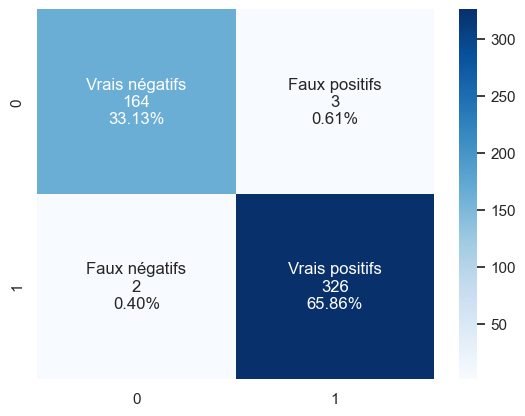

              precision    recall  f1-score   support

       False       0.99      0.98      0.98       167
        True       0.99      0.99      0.99       328

    accuracy                           0.99       495
   macro avg       0.99      0.99      0.99       495
weighted avg       0.99      0.99      0.99       495



In [86]:
matrice_confusion(y_test, predSkN, 'reg_matrice-confusion')

La matrice de confusion nous permet d'évaluer les résultat de la régression logistique par rapport à nos données de base !
___
- Le nombre billets qui on été considérer comme vrais alors qu'ils étaient faux varie légèrement mais sont proche de 0 !
- Le nombre billets on été considérer comme faux alors qu'ils étaient vrais varie légèrement mais sont proche de 0 !
- Le taux de données mal prédit est proche de 1% !

_Accuracy_ : Cet indicateur nous indique le pourcentage de prédictions correctes que notre modèle a réalisé sur l'ensemble de données de test. Plus la précision est élevée, meilleur est notre modèle.
___
**Accuracy : 99 % de prédictions correctes**

#### Le modèle de la régression logistique nous a permis d'avoir pour chaque billet, la probabilité que le billet soit vrais et la probabilité que le billet soit faux.

### Choix de mes données

J'utilis la Recursive Feature Elimination with Cross-Validation (RFECV) pour sélectionner les meilleures variables explicatives dans notre modèle de régression logistique.

On va sélectioner les varibles plus moins pertinentes ou les écratés et sélectionnées celle qui le sont le plus.

In [87]:
choix = RFECV(estimator = lrSk,cv=10, scoring = 'accuracy')
choix.fit(X_train, y_train)

C:\Users\dltja\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\dltja\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_

RFECV(cv=10, estimator=LogisticRegression(penalty=None), scoring='accuracy')

J'affiche les résultats de la validation croisées dans un dataframe qui nous permets de visulaisé les informations de preformance.
Puis je l'affiche graphqiuement.

In [88]:
cv_res = pd.DataFrame(choix.cv_results_)
cv_res

,mean_test_score,std_test_score,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,split5_test_score,split6_test_score,split7_test_score,split8_test_score,split9_test_score,n_features
0,0.796050,0.025078,0.811881,0.801980,0.792079,0.772277,0.772277,0.77,0.82,0.77,0.85,0.80,1
1,0.923337,0.068199,0.881188,0.841584,0.980198,0.970297,0.990099,0.81,0.84,0.98,0.95,0.99,2
2,0.984069,0.014215,0.980198,0.960396,0.990099,1.000000,1.000000,0.98,0.96,0.99,0.98,1.00,3
3,0.988040,0.007468,1.000000,0.990099,0.990099,1.000000,0.980198,0.99,0.98,0.98,0.99,0.98,4
4,0.988040,0.008727,0.990099,0.990099,0.990099,1.000000,0.990099,0.98,0.97,0.98,0.99,1.00,5
5,0.991020,0.008304,1.000000,1.000000,0.990099,1.000000,0.990099,0.99,0.98,0.98,0.98,1.00,6


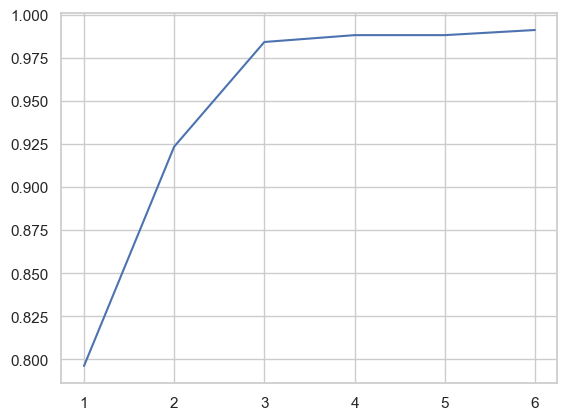

In [89]:
plt.plot(np.arange(1,7,1),cv_res['mean_test_score'])
plt.show()

In [90]:
print("Nombre de variables explicatives sélectionées : ",choix.n_features_)
print(X_train.columns[choix.support_])

Nombre de variables explicatives sélectionées :  6
Index(['diagonal', 'height_left', 'height_right', 'margin_low', 'margin_up',
       'length'],
      dtype='object')


# Programme de détection des faux billets

In [91]:
# Visualisation des données du fichier

pd.read_csv(r'C:\Users\dltja\OneDrive\Documents\DATA ANALYST\PROJETS\Projet 10 - Détectez des faux billets avec R ou Python\billets_production.csv')

,diagonal,height_left,height_right,margin_low,margin_up,length,id
0,171.76,104.01,103.54,5.21,3.30,111.42,A_1
1,171.87,104.17,104.13,6.00,3.31,112.09,A_2
2,172.00,104.58,104.29,4.99,3.39,111.57,A_3
3,172.49,104.55,104.34,4.44,3.03,113.20,A_4
4,171.65,103.63,103.56,3.77,3.16,113.33,A_5


In [92]:
# On enregistre les données d'entrainement dans un dictionnaire

data_train = {}
data_train[0] = std_scale
data_train[1] = pca
data_train[2] = lrSk
data_train

{0: StandardScaler(),
 1: PCA(n_components=2),
 2: LogisticRegression(penalty=None)}

In [93]:
import pickle

file = open('train', 'wb')
pickle.dump(data_train, file)
file.close()

In [94]:
# Import des librairies utiliser

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn as sk
from sklearn.decomposition import PCA
import pickle
import csv

# Programe de detection de faux billets

def detection_billets(fichier_csv):
    
    # Import des données d'entrainement
    file = open('train', 'rb')
    data_train = pickle.load(file)
    file.close()
    std_scale = data_train[0]
    pca = data_train[1]
    regression = data_train[2]
    
    # Import des données du fichier
    data = pd.read_csv(fichier_csv)
    X_csv = data.drop(['id'], axis=1) # On ne prend pas l'ID
    X_csv = pd.DataFrame(std_scale.transform(X_csv), columns=X_csv.columns) # Standardisation des données
    
    # Regression logistique
    y_log = regression.predict(X_csv)
    pred = pd.DataFrame(y_log)
    pred = pred.rename(columns={0: 'Prédiction'})
    pred = pred.replace({False: 'Faux billet', True: 'Vrais billet'})
    
    y_proba = regression.predict_proba(X_csv)
    proba = pd.DataFrame(y_proba)
    proba = proba.rename(columns={0: 'Probabilité de faux', 1: 'Probabilité de vrais'})
    
    # Concaténation des données
    prediction = pd.concat([pred, proba], axis = 1)
    res = pd.concat([prediction, data], axis = 1)
    
    # Recherche des billets à revérifier, car probabilité de Vrais ou Faux infèrieur à 90% !
    verif_billet = res.loc[(res['Probabilité de vrais'] > 0.10) & (res['Probabilité de vrais'] < 0.90)]
    
    # Création d'un fichier CSV avec les résultats
    res.to_csv('Resultats_Detections_Billets.csv', index = True)
    
    # Création d'un fichier CSV avec les billets à revérifier si il y en a !
    if(len(verif_billet)>0):
        verif_billet.to_csv('Billets_à_Vérifier.csv', index = True)
    
    return(res)

In [95]:
detection_billets('billets_production.csv')

,Prédiction,Probabilité de faux,Probabilité de vrais,diagonal,height_left,height_right,margin_low,margin_up,length,id
0,Faux billet,1.000000e+00,5.200658e-11,171.76,104.01,103.54,5.21,3.30,111.42,A_1
1,Faux billet,1.000000e+00,5.968902e-16,171.87,104.17,104.13,6.00,3.31,112.09,A_2
2,Faux billet,1.000000e+00,7.818735e-18,172.00,104.58,104.29,4.99,3.39,111.57,A_3
3,Vrais billet,2.851296e-01,7.148704e-01,172.49,104.55,104.34,4.44,3.03,113.20,A_4
4,Vrais billet,1.378271e-10,1.000000e+00,171.65,103.63,103.56,3.77,3.16,113.33,A_5
